## Predicting Movie Revenues
0. Explore data.
1. Feature Pre-processing: check for missing values. 
2. Feature Engineering: skewness, handle categorical data, scale features, selecting meaningful features, assess importance with random forests.
3. Further Data Exploration.
4. Choose evaluation metrics.
5. Create a benchmark to improve from it.
6. Split Data into K-folds.
7. Choose models, implement them.
8. Create an ensemble model.
9. Create submission files.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from IPython.display import display # Allows the use of display() for DataFrames
from time import time
import matplotlib.pyplot as plt
import seaborn as sns # Plotting library
from scipy import stats
from collections import Counter
import json
from sklearn.metrics import mean_squared_error
from math import sqrt
import lightgbm as lgb

%matplotlib inline

import os
print(os.listdir("../input"))

# Always show all columns
pd.set_option('display.max_columns', 999)

['sample_submission.csv', 'test.csv', 'train.csv']


In [2]:
# Open the train and test data into a dataframe.
data_train_raw = pd.read_csv("../input/train.csv")
data_test_raw = pd.read_csv("../input/test.csv")

# Display the data to see what it looks like
display(data_train_raw.head(n=3))

display(data_test_raw.head(n=3))

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000


,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,/tnftmLMemPLduW6MRyZE0ZUD19z.jpg,NaN,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,/9MgBNBqlH1sG4yG2u4XkwI5CoJa.jpg,"[{'name': 'Woolner Brothers Pictures Inc.', 'i...","[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,/ed6nD7h9sbojSWY2qrnDcSvDFko.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."


## 0. Data Exploration

In [3]:
display(data_train_raw.describe())

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


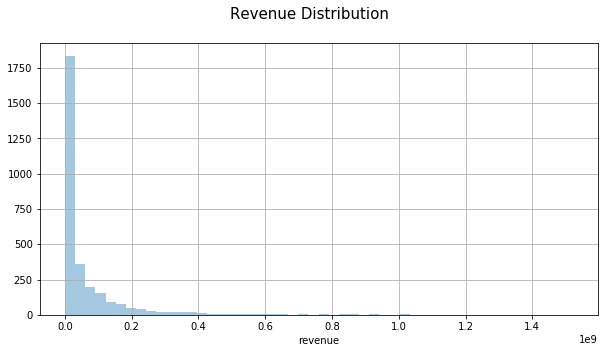

In [4]:
# Revenues are skewed
fig, ax = plt.subplots(figsize=(10,5))
fig.suptitle('Revenue Distribution', fontsize=15)
sns.distplot(data_train_raw['revenue'], bins=50, kde=False)
ax.grid()

/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


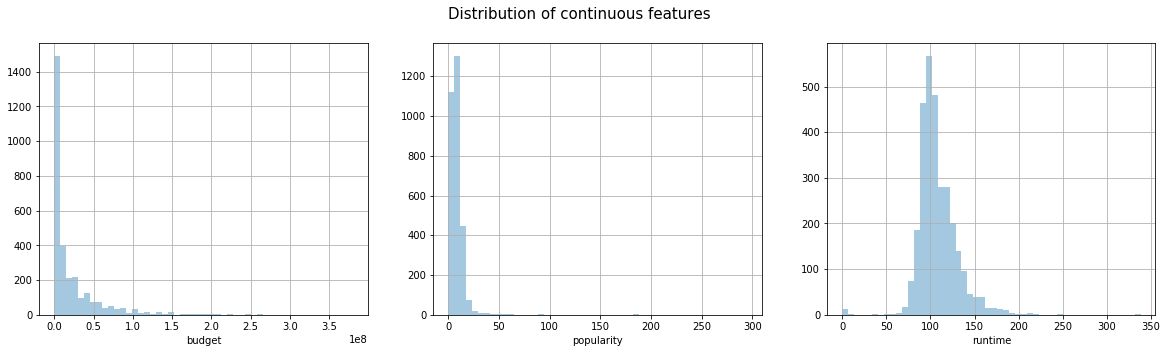

In [5]:
# Check the distribution of some of the continous features
fig, ax = plt.subplots(ncols=3, figsize=(20,5))
fig.suptitle('Distribution of continuous features', fontsize=15)

features_to_explore = ['budget', 'popularity', 'runtime']

for col, feature in enumerate(features_to_explore):
    myplot = sns.distplot(data_train_raw[feature], bins=50, kde=False, ax=ax[col])
    myplot.grid()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


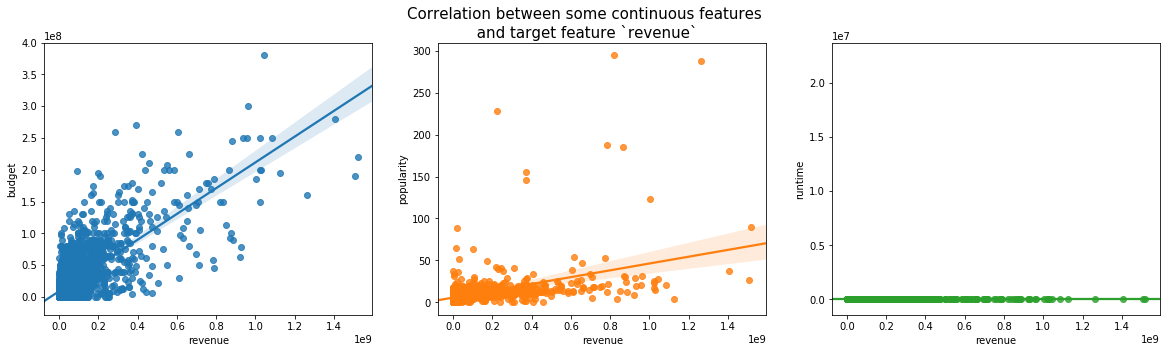

In [6]:
# Check correlation between revenue and some of the continous features
fig, ax = plt.subplots(ncols=3, figsize=(20,5))
fig.suptitle('Correlation between some continuous features\n and target feature `revenue`', fontsize=15)

for col, feature in enumerate(features_to_explore):
    myplot = sns.regplot(x='revenue', y=feature, data=data_train_raw, ax=ax[col])

## 1. Data Pre-Processing

Reference for feature pre-processing: [EDA + FE + LGBM (no external data)](https://www.kaggle.com/dude431/eda-fe-lgbm-no-external-data)

Things to do:
* Check for missing values (NaN)
* Check for 0 values

#### Runtime

The feature ```runtime``` has some values with the value 0. This doesn't make much sense as any film must run for at least some time, therefore we will swap all the 0 values with the mean.

In [7]:
## Train data
data_train_preprocessed = data_train_raw.copy()
## Test data
data_test_preprocessed = data_test_raw.copy()

In [8]:
# Swap NaN values with the mean
def runtime_pre_process(df):
    df['runtime'] = df['runtime'].fillna(0)
    
    # Swap runtime with 0 values for the average
    runtime_mean = df['runtime'].mean()
    
    df['runtime'] = df['runtime'].replace(0, runtime_mean)
    
    return df

In [9]:
data_train_preprocessed = runtime_pre_process(data_train_preprocessed)
data_test_preprocessed = runtime_pre_process(data_test_preprocessed)

# Before
print(data_train_raw['runtime'].loc[data_train_raw['runtime'] == 0].count())
# After
print(data_train_preprocessed['runtime'].loc[data_train_preprocessed['runtime'] == 0].count())

12
0


### Release time

We will separate release date into ```release year```, ```release month``` and ```release day```

In [10]:
print(data_test_preprocessed['release_date'].value_counts()[:1])
display(data_test_preprocessed['release_date'].isna().value_counts())
# Fill any NaN values with  the most common Value
data_test_preprocessed.loc[data_test_preprocessed['release_date'].isnull() == True, 'release_date'] = '01/01/98'

9/9/11    7
Name: release_date, dtype: int64


False    4397
True        1
Name: release_date, dtype: int64

In [11]:
def release_year_pre_process (df):
    # Fill any NaN values
    df.loc[df['release_date'].isnull() == True, 'release_date'] = '01/01/98'
    
    df['release_date'] = pd.to_datetime(df['release_date'])
    df['release_month'] = df['release_date'].apply(lambda d: d.month)
    df['release_day'] = df['release_date'].apply(lambda d: d.day)

    # For some reason some dates were put into the future
    df['release_year'] = df['release_date'].apply(lambda d: d.year if d.year < 2018 else d.year -100)
    
    return df

In [12]:
data_train_preprocessed = release_year_pre_process(data_train_preprocessed)
data_test_preprocessed = release_year_pre_process(data_test_preprocessed)

display(data_train_preprocessed.head(n=1))

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,release_month,release_day,release_year
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2015-02-20,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,2,20,2015


#### Homepage

If it has a homepage I will substitute it by a 1. Otherwise a 0.

In [13]:
def homepage_pre_process(df):
    # Replace NaN values with 0
    df['homepage'] = df['homepage'].fillna(0)
    
    # Replace rows with websites with 1
    df.loc[df['homepage'] != 0, 'homepage'] = 1
    
    return df

In [14]:
data_train_preprocessed = homepage_pre_process(data_train_preprocessed)
data_test_preprocessed = homepage_pre_process(data_test_preprocessed)

display(data_train_preprocessed['homepage'].head())

0    0
1    0
2    1
3    1
4    0
Name: homepage, dtype: int64

#### Poster

If it has a poster I will substitute it by a 1. Otherwise a 0.

In [15]:
def poster_pre_process(df):
    # Replace NaN values with 0
    df['poster_path'] = df['poster_path'].fillna(0)
    
    # Replace rows with websites with 1
    df.loc[df['poster_path'] != 0, 'poster_path'] = 1
    
    return df

In [16]:
data_train_preprocessed = poster_pre_process(data_train_preprocessed)
data_test_preprocessed = poster_pre_process(data_test_preprocessed)

display(data_train_preprocessed['poster_path'].head())

0    1
1    1
2    1
3    1
4    1
Name: poster_path, dtype: int64

#### Budget

The other feature that includes some 0 values is ```budget```. This in the otherhand could happen. However it doesn't make much sense after exploring that some production companies like 'Walt Disney' or '20th Century Fox' would produce a film with 0 budget.

In [17]:
# Count how many films have budget 0
print(data_train_preprocessed['budget'].loc[data_train_preprocessed['budget'] == 0].count())

print(data_test_preprocessed['budget'].loc[data_test_preprocessed['budget'] == 0].count())

812
1211


We check the correlation of the different features with budget to see which ones are affect most the budget feature.

There seems to be some correlation between ```budget``` and ```popularity``` and ```budget``` and ```release year```.

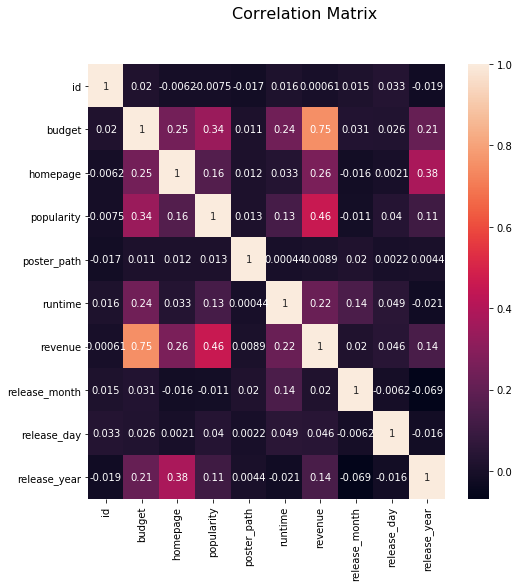

In [18]:
fig, axs = plt.subplots(figsize=(8,8))
fig.suptitle('Correlation Matrix', fontsize=16)
sns.heatmap(data_train_preprocessed.corr(), annot=True, ax=axs)

In [19]:
# Check for correlations between budget and other features
numerical_features = ['budget', 'popularity', 'poster_path', 'homepage', 'release_year', 'release_month', 'release_day', 'runtime']

correlation_budget = []
for column in data_train_preprocessed[numerical_features].loc[data_train_preprocessed['budget'] != 0]:
    pearson_corr, _ = stats.pearsonr(data_train_preprocessed['budget'], data_train_preprocessed[column])
    correlation_budget.append(('budget', column, pearson_corr))
    
display(pd.DataFrame(data=correlation_budget, columns=['Start Feature', 'Target', 'Correlation value']))

,Start Feature,Target,Correlation value
0,budget,budget,1.000000
1,budget,popularity,0.342356
2,budget,poster_path,0.011114
3,budget,homepage,0.247627
4,budget,release_year,0.213915
5,budget,release_month,0.031094
6,budget,release_day,0.025745
7,budget,runtime,0.239679


In [20]:
# We will input the budget with ceros with the year's average
def imputing_budget(df):
    df['budget'] = df['budget'].fillna(0)
    year_mean = df.groupby(['release_year']).mean()['budget']
    
    for index, row in df.iterrows():
        if row['budget'] == 0:
            year_of_release = row['release_year']
            df.at[index,'budget'] = year_mean[year_of_release]
            
    return df

In [21]:
# Update our data
data_train_preprocessed = imputing_budget(data_train_preprocessed)
data_test_preprocessed = imputing_budget(data_test_preprocessed)

# Check how many values have 0 now.
print(data_train_preprocessed['budget'].loc[data_train_preprocessed['budget'] == 0].count())
print(data_test_preprocessed['budget'].loc[data_test_preprocessed['budget'] == 0].count())

4
1


#### Belongs to Collection

Fill NaN values with ´None´

In [22]:
# Count how many ´belongs to collection´ have NaN values
print(data_train_preprocessed['belongs_to_collection'].head())
print('\n')
print(data_train_preprocessed['belongs_to_collection'].isna().value_counts())

0    [{'id': 313576, 'name': 'Hot Tub Time Machine ...
1    [{'id': 107674, 'name': 'The Princess Diaries ...
2                                                  NaN
3                                                  NaN
4                                                  NaN
Name: belongs_to_collection, dtype: object


True     2396
False     604
Name: belongs_to_collection, dtype: int64


In [23]:
def collection_pre_process(df):
    # Change NaN values with ´0´.
    df['belongs_to_collection'] = df['belongs_to_collection'].fillna('0')
    
    # Replace rows that belong to collection with 1
    df.loc[df['belongs_to_collection'] != 0, 'belongs_to_collection'] = 1
    
    return df

In [24]:
data_train_preprocessed = collection_pre_process(data_train_preprocessed)
data_test_preprocessed = collection_pre_process(data_test_preprocessed)

# Check for NaN values
print(data_train_preprocessed['belongs_to_collection'].isna().value_counts())
display(data_train_preprocessed.head(n=1))

False    3000
Name: belongs_to_collection, dtype: int64


,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,release_month,release_day,release_year
0,1,1,14000000,"[{'id': 35, 'name': 'Comedy'}]",0,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,1,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2015-02-20,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,2,20,2015


#### Genres

For the genres I will input any NaN values with the most common. I am not sure this is the best way to go about it, but I'll do this for now.

In [25]:
# Change NaN values with the most common value
print(data_train_preprocessed['genres'].isna().value_counts())
print('\n')
print(data_train_preprocessed['genres'].value_counts()[:5])

False    2993
True        7
Name: genres, dtype: int64


[{'id': 18, 'name': 'Drama'}]                                       266
[{'id': 35, 'name': 'Comedy'}]                                      186
[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]     108
[{'id': 35, 'name': 'Comedy'}, {'id': 10749, 'name': 'Romance'}]     88
[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}]          85
Name: genres, dtype: int64


In [26]:
def genres_pre_processing(df):
    # Most common value is Drama, so I'll fill empty values with [{'id': 18, 'name': 'Drama'}]
    df['genres'] = df['genres'].fillna("[{'id': 18, 'name': 'Drama'}]")
    
    return df

In [27]:
data_train_preprocessed = genres_pre_processing(data_train_preprocessed)
data_test_preprocessed = genres_pre_processing(data_test_preprocessed)

# Check for NaN values
print(data_train_preprocessed['genres'].isna().value_counts())

False    3000
Name: genres, dtype: int64


#### Original Title

In [28]:
# No missing values in train
print(data_train_preprocessed['original_title'].isna().value_counts())

# No missing values in test
print(data_test_preprocessed['original_title'].isna().value_counts())

False    3000
Name: original_title, dtype: int64
False    4398
Name: original_title, dtype: int64


#### Title

For any title missing values we will fill it with the same name as ```original_title```

In [29]:
# Fill ´none´ titles with the same value as ´original_title´
def imput_title(df):
    df['title'] = df['title'].fillna("none")

    for index, row in df.iterrows():
        if row['title'] == "none":
            df.at[index,'title'] = df.loc[index]['original_title']
    return df        

In [30]:
data_train_preprocessed = imput_title(data_train_preprocessed)
data_test_preprocessed = imput_title(data_test_preprocessed)

# Check Nan for train
print(data_train_preprocessed['original_title'].isna().value_counts())

False    3000
Name: original_title, dtype: int64


#### Original language

In [31]:
# No missing values in train
print(data_train_preprocessed['original_language'].isna().value_counts())

# No missing values in test
print(data_test_preprocessed['original_language'].isna().value_counts())

False    3000
Name: original_language, dtype: int64
False    4398
Name: original_language, dtype: int64


#### Production Companies

Replace NaN values with 'none'

In [32]:
def prod_comp_pre_processing(df):
    # Replace NaN values with 'none'
    df['production_companies'] = df['production_companies'].fillna("none")
    
    return df

In [33]:
data_train_preprocessed = prod_comp_pre_processing(data_train_preprocessed)
data_test_preprocessed = prod_comp_pre_processing(data_test_preprocessed)

# Check for NaNs
print(data_train_preprocessed['production_companies'].isna().value_counts())
print(data_test_preprocessed['production_companies'].isna().value_counts())

False    3000
Name: production_companies, dtype: int64
False    4398
Name: production_companies, dtype: int64


#### Spoken languages

Replace NaN values with the most common

In [34]:
def spoken_lang_pre_processing(df):
    # Replace NaN values with the most common [{'iso_639_1': 'en', 'name': 'English'}]
    df['spoken_languages'] = df['spoken_languages'].fillna("[{'iso_639_1': 'en', 'name': 'English'}]")
    
    return df

In [35]:
data_train_preprocessed = spoken_lang_pre_processing(data_train_preprocessed)
data_test_preprocessed = spoken_lang_pre_processing(data_test_preprocessed)

# Check for NaN values
print(data_train_preprocessed['spoken_languages'].isna().value_counts())
print(data_test_preprocessed['spoken_languages'].isna().value_counts())

False    3000
Name: spoken_languages, dtype: int64
False    4398
Name: spoken_languages, dtype: int64


#### Keywords

Replace NaN values with 'none'

In [36]:
def keywords_pre_processing(df):
    # Replace NaN values with 'none'
    df['Keywords'] = df['Keywords'].fillna("none")
    
    return df

In [37]:
data_train_preprocessed = keywords_pre_processing(data_train_preprocessed)
data_test_preprocessed = keywords_pre_processing(data_test_preprocessed)

# Check for NaN values
print(data_train_preprocessed['Keywords'].isna().value_counts())
print(data_test_preprocessed['Keywords'].isna().value_counts())

False    3000
Name: Keywords, dtype: int64
False    4398
Name: Keywords, dtype: int64


#### Cast

Replace NaN values with 'none'

In [38]:
def cast_pre_processing(df):
    # Replace NaN values with 'none'
    df['cast'] = df['cast'].fillna("none")
    
    return df

In [39]:
data_train_preprocessed = cast_pre_processing(data_train_preprocessed)
data_test_preprocessed = cast_pre_processing(data_test_preprocessed)

# Check for NaN values
print(data_train_preprocessed['cast'].isna().value_counts())
print(data_test_preprocessed['cast'].isna().value_counts())

False    3000
Name: cast, dtype: int64
False    4398
Name: cast, dtype: int64


#### Crew

Replace NaN values with 'none'

In [40]:
def crew_pre_processing(df):
    # Replace NaN values with 'none'
    df['crew'] = df['crew'].fillna("none")
    
    return df

In [41]:
data_train_preprocessed = crew_pre_processing(data_train_preprocessed)
data_test_preprocessed = crew_pre_processing(data_test_preprocessed)

# Check for NaN values
print(data_train_preprocessed['crew'].isna().value_counts())
print(data_test_preprocessed['crew'].isna().value_counts())

False    3000
Name: crew, dtype: int64
False    4398
Name: crew, dtype: int64


#### Overview

Replace NaN values with " "

In [42]:
def overview_pre_process(df):
    # Replace NaN values with ""
    df['overview'] = df['overview'].fillna("")
    
    return df

In [43]:
data_train_preprocessed = overview_pre_process(data_train_preprocessed)
data_test_preprocessed = overview_pre_process(data_test_preprocessed)

# Check for NaN values
print(data_train_preprocessed['overview'].isna().value_counts())
print(data_test_preprocessed['overview'].isna().value_counts())

False    3000
Name: overview, dtype: int64
False    4398
Name: overview, dtype: int64


#### Tagline

In [44]:
def tagline_pre_process(df):
    # Replace NaN values with ''
    df['tagline'] = df['tagline'].fillna("")
    
    return df

In [45]:
data_train_preprocessed = tagline_pre_process(data_train_preprocessed)
data_test_preprocessed = tagline_pre_process(data_test_preprocessed)

# Check for NaN values
print(data_train_preprocessed['tagline'].isna().value_counts())
print(data_test_preprocessed['tagline'].isna().value_counts())

False    3000
Name: tagline, dtype: int64
False    4398
Name: tagline, dtype: int64


#### Production Countries

In [46]:
data_train_preprocessed['production_countries'].value_counts()[:5]

[{'iso_3166_1': 'US', 'name': 'United States of America'}]                                                    1752
[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}, {'iso_3166_1': 'US', 'name': 'United States of America'}]     118
[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]                                                                94
[{'iso_3166_1': 'IN', 'name': 'India'}]                                                                         69
[{'iso_3166_1': 'FR', 'name': 'France'}]                                                                        51
Name: production_countries, dtype: int64

In [47]:
def prod_countries_pre_process(df):
    # Replace NaN values with most common
    df['production_countries'] = df['production_countries'].fillna("[{'iso_3166_1': 'US', 'name': 'United States of America'}]")
    
    return df

In [48]:
data_train_preprocessed = prod_countries_pre_process(data_train_preprocessed)
data_test_preprocessed = prod_countries_pre_process(data_test_preprocessed)

# Check for NaN values
print(data_train_preprocessed['production_countries'].isna().value_counts())
print(data_test_preprocessed['production_countries'].isna().value_counts())

False    3000
Name: production_countries, dtype: int64
False    4398
Name: production_countries, dtype: int64


#### Status

Fill any `NaN` values with the most common

In [49]:
print("NaN values in train['status'] : {}".format(data_train_preprocessed['status'].isna().any()))
print("NaN values in test['status'] : {}".format(data_test_preprocessed['status'].isna().any()))
print('\nValue Counts train:')
print(data_train_preprocessed['status'].value_counts())

NaN values in train['status'] : False
NaN values in test['status'] : True

Value Counts train:
Released    2996
Rumored        4
Name: status, dtype: int64


In [50]:
def status_pre_process(df):
    df['status'] = df['status'].fillna("Released")
    
    return df

In [51]:
data_train_preprocessed = status_pre_process(data_train_preprocessed)
data_test_preprocessed = status_pre_process(data_test_preprocessed)

display(data_test_preprocessed['status'].value_counts())

Released           4391
Post Production       5
Rumored               2
Name: status, dtype: int64

#### FInal check for NaN values in the data

In [52]:
display(data_train_preprocessed.isna().any())
display(data_test_preprocessed.isna().any())

id                       False
belongs_to_collection    False
budget                   False
genres                   False
homepage                 False
imdb_id                  False
original_language        False
original_title           False
overview                 False
popularity               False
poster_path              False
production_companies     False
production_countries     False
release_date             False
runtime                  False
spoken_languages         False
status                   False
tagline                  False
title                    False
Keywords                 False
cast                     False
crew                     False
revenue                  False
release_month            False
release_day              False
release_year             False
dtype: bool

id                       False
belongs_to_collection    False
budget                   False
genres                   False
homepage                 False
imdb_id                  False
original_language        False
original_title           False
overview                 False
popularity               False
poster_path              False
production_companies     False
production_countries     False
release_date             False
runtime                  False
spoken_languages         False
status                   False
tagline                  False
title                    False
Keywords                 False
cast                     False
crew                     False
release_month            False
release_day              False
release_year             False
dtype: bool

## 2. Feature Engineering

Reference: [EDA, Feature Engineering and model interpretation](https://www.kaggle.com/artgor/eda-feature-engineering-and-model-interpretation)

* Handle data with multiple values
* Deal with skeweness
* Deal with Text data
* Handle Categorical data
* Scale features
* Select Meaningful features
* Assess importance with random features

In [53]:
# Drop some columns that we won't use
data_train_cleaned = data_train_preprocessed.copy()
data_test_cleaned = data_test_preprocessed.copy()

data_train_cleaned = data_train_cleaned.drop(['imdb_id'], axis=1)
data_test_cleaned = data_test_cleaned.drop(['imdb_id'], axis=1)

### Handling data with multiple values

In this section I'll take care of cells that contain an array or dict of values. I'll separate them into different columns for each unique value (one hot encoding). In some cases there are too many unique values, in those situtations I will have to stablish a limit, selecting only the top-k most popular features.

* genres
* production_companies 
* production_countries
* spoken_languages
* Keywords
* cast
* crew

In [54]:
import ast

# Convert panda list string to actual list
string_lists = ['genres', 'production_companies', 'production_countries', 'spoken_languages', 'cast', 'crew', 'Keywords']

def string2_list(df):
    for string_list in string_lists:
        df[string_list] = df[string_list].apply(lambda x: {} if x == 'none' else ast.literal_eval(x))
        
    return df
        
data_train_cleaned = string2_list(data_train_cleaned)
data_test_cleaned = string2_list(data_test_cleaned)


In [55]:
# Flattens a a list of lists of dicts into a simple list of dicts
def flatten_data_column(mylist):
    flattened_list = []
    for elements in mylist:
        for element in elements:
            flattened_list.append(element)
    return flattened_list


In [56]:
# Groups by repeated value and counts the ocurrences
def create_counter(mylist, key='name'):
    return Counter([i[key] for i in mylist]).most_common()

#### **Genres**

In [57]:
# Lets get the list of genres
genres_list = flatten_data_column(data_train_cleaned['genres'])

genres_list_test = flatten_data_column(data_test_cleaned['genres'])

In [58]:
# Create a counter of the most popular genres
genres_list_counter = create_counter(genres_list)
genres_list_counter_test = create_counter(genres_list_test)

Lets separate the columns into 20 different genres

In [59]:
def genres_FE(df, genres_counter):
    df['num_genres'] = df['genres'].apply(lambda x: len(x) if x != {} else 0)
    df['all_genres'] = df['genres'].apply(lambda x: [i['name'] for i in x])
    
    for genre, count in genres_counter:
        df['genre_' + genre] = df['all_genres'].apply(lambda g_list: 1 if genre in g_list else 0)
    
    df['all_genres'] = df['all_genres'].apply(lambda x: " ".join(x))
    df = df.drop(['genres'], axis=1)
    
    return df
        
data_train_cleaned = genres_FE(data_train_cleaned, genres_list_counter)
data_test_cleaned = genres_FE(data_test_cleaned, genres_list_counter)

In [60]:
display(data_train_cleaned.head(n=1))

,id,belongs_to_collection,budget,homepage,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,release_month,release_day,release_year,num_genres,all_genres,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,genre_War,genre_Documentary,genre_Western,genre_Foreign,genre_TV Movie
0,1,1,14000000,0,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,1,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2015-02-20,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,2,20,2015,1,Comedy,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Production Companies

Here we will do something similar to genres. Find out how many unique values there are, and create a column for each with a 1 if the film contains that production company, and a 0 if not.

In [61]:
# Lets get the list of production companies
prod_companies_list = flatten_data_column(data_train_cleaned['production_companies'])
prod_companies_list_test = flatten_data_column(data_test_cleaned['production_companies'])

In [62]:
# Create a counter of the most popular
prod_companies_list_counter = create_counter(prod_companies_list)
prod_companies_list_counter_test = create_counter(prod_companies_list_test)

In [63]:
# Let's select the top 30 companies
print(prod_companies_list_counter[:30])

[('Warner Bros.', 202), ('Universal Pictures', 188), ('Paramount Pictures', 161), ('Twentieth Century Fox Film Corporation', 138), ('Columbia Pictures', 91), ('Metro-Goldwyn-Mayer (MGM)', 84), ('New Line Cinema', 75), ('Touchstone Pictures', 63), ('Walt Disney Pictures', 62), ('Columbia Pictures Corporation', 61), ('TriStar Pictures', 53), ('Relativity Media', 48), ('Canal+', 46), ('United Artists', 44), ('Miramax Films', 40), ('Village Roadshow Pictures', 36), ('Regency Enterprises', 31), ('BBC Films', 30), ('Dune Entertainment', 30), ('Working Title Films', 30), ('Fox Searchlight Pictures', 29), ('StudioCanal', 28), ('Lionsgate', 28), ('DreamWorks SKG', 27), ('Fox 2000 Pictures', 25), ('Summit Entertainment', 24), ('Hollywood Pictures', 24), ('Orion Pictures', 24), ('Amblin Entertainment', 23), ('Dimension Films', 23)]


In [64]:
def prod_companies_FE(df, prod_companies_counter, limit=100):
    df['num_production_companies'] = df['production_companies'].apply(lambda x: len(x) if x != {} else 0)
    df['all_production_companies'] = df['production_companies'].apply(lambda x: [i['name'] for i in x])
    
    for prod_company, count in prod_companies_counter[:limit]:
        df['production_company_' + "_".join(prod_company.split(" "))] = df['all_production_companies'].apply(lambda pcomp_list: 1 if prod_company in pcomp_list else 0)
    
    df['all_production_companies'] = df['all_production_companies'].apply(lambda x: " ".join(x))
    df = df.drop(['production_companies'], axis=1)
        
    return df

data_train_cleaned = prod_companies_FE(data_train_cleaned, prod_companies_list_counter, 30)
data_test_cleaned = prod_companies_FE(data_test_cleaned, prod_companies_list_counter_test, 30)

#### Spoken Languages

In [65]:
# Lets get the list of spoken languages
spoken_languages_list = flatten_data_column(data_train_cleaned['spoken_languages'])
spoken_languages_list_test = flatten_data_column(data_test_cleaned['spoken_languages'])

# Create a counter of the most popular
spoken_languages_list_counter = create_counter(spoken_languages_list)
spoken_languages_list_counter_test = create_counter(spoken_languages_list_test)

In [66]:
print(spoken_languages_list_counter)

[('English', 2638), ('Français', 288), ('Español', 239), ('Deutsch', 169), ('Pусский', 152), ('Italiano', 124), ('日本語', 89), ('普通话', 68), ('हिन्दी', 56), ('', 47), ('Português', 43), ('العربية', 40), ('한국어/조선말', 37), ('广州话 / 廣州話', 36), ('தமிழ்', 27), ('Polski', 25), ('Magyar', 24), ('Latin', 23), ('svenska', 22), ('ภาษาไทย', 22), ('Český', 20), ('עִבְרִית', 15), ('ελληνικά', 15), ('Türkçe', 13), ('Dansk', 13), ('Nederlands', 10), ('فارسی', 10), ('Tiếng Việt', 10), ('اردو', 8), ('Română', 8), ('తెలుగు', 7), ('Kiswahili', 7), ('Norsk', 7), ('No Language', 7), ('suomi', 6), ('Український', 6), ('Srpski', 4), ('Afrikaans', 4), ('Gaeilge', 3), ('Català', 3), ('বাংলা', 3), ('ਪੰਜਾਬੀ', 3), ('Somali', 3), ('Íslenska', 3), ('български език', 2), ('shqip', 2), ('Bahasa indonesia', 2), ('Slovenčina', 2), ('Esperanto', 2), ('euskera', 2), ('isiZulu', 2), ('Hrvatski', 2), ('қазақ', 1), ('Wolof', 1), ('Eesti', 1), ('پښتو', 1)]


In [67]:
def spoken_languages_FE(df, spoken_languages_counter, limit=56):
    df['num_spoken_languages'] = df['spoken_languages'].apply(lambda x: len(x) if x != {} else 0)
    df['all_spoken_languages'] = df['spoken_languages'].apply(lambda x: [i['name'] for i in x])
    
    for spoken_language, count in spoken_languages_counter[:limit]:
        df['language_' + spoken_language] = df['all_spoken_languages'].apply(lambda language_list: 1 if spoken_language in language_list else 0)
    
    df['all_spoken_languages'] = df['all_spoken_languages'].apply(lambda x: " ".join(x))
    df = df.drop(['spoken_languages'], axis=1)
        
    return df

spoken_languages_limit = 25

data_train_cleaned = spoken_languages_FE(data_train_cleaned, spoken_languages_list_counter, spoken_languages_limit)
data_test_cleaned = spoken_languages_FE(data_test_cleaned, spoken_languages_list_counter_test, spoken_languages_limit)

display(data_train_cleaned.head(n=2))

,id,belongs_to_collection,budget,homepage,original_language,original_title,overview,popularity,poster_path,production_countries,release_date,runtime,status,tagline,title,Keywords,cast,crew,revenue,release_month,release_day,release_year,num_genres,all_genres,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,genre_War,genre_Documentary,genre_Western,genre_Foreign,genre_TV Movie,num_production_companies,all_production_companies,production_company_Warner_Bros.,production_company_Universal_Pictures,production_company_Paramount_Pictures,production_company_Twentieth_Century_Fox_Film_Corporation,production_company_Columbia_Pictures,production_company_Metro-Goldwyn-Mayer_(MGM),production_company_New_Line_Cinema,production_company_Touchstone_Pictures,production_company_Walt_Disney_Pictures,production_company_Columbia_Pictures_Corporation,production_company_TriStar_Pictures,production_company_Relativity_Media,production_company_Canal+,production_company_United_Artists,production_company_Miramax_Films,production_company_Village_Roadshow_Pictures,production_company_Regency_Enterprises,production_company_BBC_Films,production_company_Dune_Entertainment,production_company_Working_Title_Films,production_company_Fox_Searchlight_Pictures,production_company_StudioCanal,production_company_Lionsgate,production_company_DreamWorks_SKG,production_company_Fox_2000_Pictures,production_company_Summit_Entertainment,production_company_Hollywood_Pictures,production_company_Orion_Pictures,production_company_Amblin_Entertainment,production_company_Dimension_Films,num_spoken_languages,all_spoken_languages,language_English,language_Français,language_Español,language_Deutsch,language_Pусский,language_Italiano,language_日本語,language_普通话,language_हिन्दी,language_,language_Português,language_العربية,language_한국어/조선말,language_广州话 / 廣州話,language_தமிழ்,language_Polski,language_Magyar,language_Latin,language_svenska,language_ภาษาไทย,language_Český,language_עִבְרִית,language_ελληνικά,language_Türkçe,language_Dansk
0,1,1,14000000,0,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,1,"[{'iso_3166_1': 'US', 'name': 'United States o...",2015-02-20,93.0,Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,2,20,2015,1,Comedy,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,Paramount Pictures United Artists Metro-Goldwy...,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,English,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1,40000000,0,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,1,"[{'iso_3166_1': 'US', 'name': 'United States o...",2004-08-06,113.0,Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,8,6,2004,4,Comedy Drama Family Romance,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,Walt Disney Pictures,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,English,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Original Language

In [68]:
# Creates a List of orignal languages
def list_original_languages(mylist):
    flattened_list = []
    for element in mylist:
            flattened_list.append(element)
    return flattened_list


In [69]:
# Lets get the list of spoken languages
original_language_list = list_original_languages(data_train_cleaned['original_language'])
original_language_list_test = list_original_languages(data_test_cleaned['original_language'])

# Create a counter of the most popular
original_language_list_counter = Counter(original_language_list).most_common()
original_language_list_counter_test = Counter(original_language_list_test).most_common()

print(original_language_list_counter)
print(len(original_language_list_counter))

[('en', 2575), ('fr', 78), ('ru', 47), ('es', 43), ('hi', 42), ('ja', 37), ('it', 24), ('ko', 20), ('cn', 20), ('zh', 19), ('de', 18), ('ta', 16), ('sv', 8), ('nl', 6), ('pt', 6), ('fa', 5), ('da', 5), ('ro', 4), ('tr', 3), ('hu', 3), ('te', 2), ('fi', 2), ('no', 2), ('pl', 2), ('ml', 2), ('sr', 1), ('cs', 1), ('mr', 1), ('el', 1), ('ur', 1), ('he', 1), ('ar', 1), ('nb', 1), ('vi', 1), ('bn', 1), ('id', 1)]
36


In [70]:
def original_language_FE(df, original_languages_counter, limit=56):
    for original_language, count in original_languages_counter:
        df['original_language_' + original_language] = df['original_language'].apply(lambda lang: 1 if lang == original_language else 0)

    df = df.drop(['original_language'], axis=1)
        
    return df

data_train_cleaned = original_language_FE(data_train_cleaned, original_language_list_counter)
data_test_cleaned = original_language_FE(data_test_cleaned, original_language_list_counter_test)

display(data_train_cleaned.head(n=2))

,id,belongs_to_collection,budget,homepage,original_title,overview,popularity,poster_path,production_countries,release_date,runtime,status,tagline,title,Keywords,cast,crew,revenue,release_month,release_day,release_year,num_genres,all_genres,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,genre_War,genre_Documentary,genre_Western,genre_Foreign,genre_TV Movie,num_production_companies,all_production_companies,production_company_Warner_Bros.,production_company_Universal_Pictures,production_company_Paramount_Pictures,production_company_Twentieth_Century_Fox_Film_Corporation,production_company_Columbia_Pictures,production_company_Metro-Goldwyn-Mayer_(MGM),production_company_New_Line_Cinema,production_company_Touchstone_Pictures,production_company_Walt_Disney_Pictures,production_company_Columbia_Pictures_Corporation,production_company_TriStar_Pictures,production_company_Relativity_Media,production_company_Canal+,production_company_United_Artists,production_company_Miramax_Films,production_company_Village_Roadshow_Pictures,production_company_Regency_Enterprises,production_company_BBC_Films,production_company_Dune_Entertainment,production_company_Working_Title_Films,production_company_Fox_Searchlight_Pictures,production_company_StudioCanal,production_company_Lionsgate,production_company_DreamWorks_SKG,production_company_Fox_2000_Pictures,production_company_Summit_Entertainment,production_company_Hollywood_Pictures,production_company_Orion_Pictures,production_company_Amblin_Entertainment,production_company_Dimension_Films,num_spoken_languages,all_spoken_languages,language_English,language_Français,language_Español,language_Deutsch,language_Pусский,language_Italiano,language_日本語,language_普通话,language_हिन्दी,language_,language_Português,language_العربية,language_한국어/조선말,language_广州话 / 廣州話,language_தமிழ்,language_Polski,language_Magyar,language_Latin,language_svenska,language_ภาษาไทย,language_Český,language_עִבְרִית,language_ελληνικά,language_Türkçe,language_Dansk,original_language_en,original_language_fr,original_language_ru,original_language_es,original_language_hi,original_language_ja,original_language_it,original_language_ko,original_language_cn,original_language_zh,original_language_de,original_language_ta,original_language_sv,original_language_nl,original_language_pt,original_language_fa,original_language_da,original_language_ro,original_language_tr,original_language_hu,original_language_te,original_language_fi,original_language_no,original_language_pl,original_language_ml,original_language_sr,original_language_cs,original_language_mr,original_language_el,original_language_ur,original_language_he,original_language_ar,original_language_nb,original_language_vi,original_language_bn,original_language_id
0,1,1,14000000,0,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,1,"[{'iso_3166_1': 'US', 'name': 'United States o...",2015-02-20,93.0,Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,2,20,2015,1,Comedy,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,Paramount Pictures United Artists Metro-Goldwy...,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,English,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1,40000000,0,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,1,"[{'iso_3166_1': 'US', 'name': 'United States o...",2004-08-06,113.0,Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'M

#### Keywords

In [71]:
# Lets get the list of kewords
keywords_list = flatten_data_column(data_train_cleaned['Keywords'])
keywords_list_test = flatten_data_column(data_test_cleaned['Keywords'])

# Create a counter of the most popular keywords
keywords_list_counter = create_counter(keywords_list)
keywords_list_counter_test = create_counter(keywords_list_test)

In [72]:
print(keywords_list_counter[:30])

[('woman director', 175), ('independent film', 155), ('duringcreditsstinger', 134), ('murder', 123), ('based on novel', 111), ('violence', 87), ('sport', 82), ('biography', 77), ('aftercreditsstinger', 75), ('dystopia', 73), ('revenge', 73), ('friendship', 72), ('sex', 71), ('suspense', 67), ('sequel', 66), ('love', 64), ('police', 64), ('teenager', 61), ('nudity', 57), ('female nudity', 53), ('drug', 52), ('prison', 50), ('musical', 49), ('high school', 49), ('los angeles', 48), ('new york', 47), ('family', 45), ('father son relationship', 44), ('kidnapping', 41), ('investigation', 41)]


In [73]:
def keywords_FE(df, keywords_counter, limit=100):
    df['num_keywords'] = df['Keywords'].apply(lambda x: len(x) if x != {} else 0)
    df['all_keywords'] = df['Keywords'].apply(lambda x: [i['name'] for i in x])
    
    for keyword, count in keywords_counter[:limit]:
        df['keyword_' + keyword] = df['all_keywords'].apply(lambda keyword_list: 1 if keyword in keyword_list else 0)
    
    df['all_keywords'] = df['all_keywords'].apply(lambda x: " ".join(x))
    df = df.drop(['Keywords'], axis=1)
        
    return df

keywords_limit = 30

data_train_cleaned = keywords_FE(data_train_cleaned, keywords_list_counter, keywords_limit)
data_test_cleaned = keywords_FE(data_test_cleaned, keywords_list_counter_test, keywords_limit)

display(data_train_cleaned.head(n=2))

,id,belongs_to_collection,budget,homepage,original_title,overview,popularity,poster_path,production_countries,release_date,runtime,status,tagline,title,cast,crew,revenue,release_month,release_day,release_year,num_genres,all_genres,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,genre_War,genre_Documentary,genre_Western,genre_Foreign,genre_TV Movie,num_production_companies,all_production_companies,production_company_Warner_Bros.,production_company_Universal_Pictures,production_company_Paramount_Pictures,production_company_Twentieth_Century_Fox_Film_Corporation,production_company_Columbia_Pictures,production_company_Metro-Goldwyn-Mayer_(MGM),production_company_New_Line_Cinema,production_company_Touchstone_Pictures,production_company_Walt_Disney_Pictures,production_company_Columbia_Pictures_Corporation,production_company_TriStar_Pictures,production_company_Relativity_Media,production_company_Canal+,production_company_United_Artists,production_company_Miramax_Films,production_company_Village_Roadshow_Pictures,production_company_Regency_Enterprises,production_company_BBC_Films,production_company_Dune_Entertainment,production_company_Working_Title_Films,production_company_Fox_Searchlight_Pictures,production_company_StudioCanal,production_company_Lionsgate,production_company_DreamWorks_SKG,production_company_Fox_2000_Pictures,production_company_Summit_Entertainment,production_company_Hollywood_Pictures,production_company_Orion_Pictures,production_company_Amblin_Entertainment,production_company_Dimension_Films,num_spoken_languages,all_spoken_languages,language_English,language_Français,language_Español,language_Deutsch,language_Pусский,language_Italiano,language_日本語,language_普通话,language_हिन्दी,language_,language_Português,language_العربية,language_한국어/조선말,language_广州话 / 廣州話,language_தமிழ்,language_Polski,language_Magyar,language_Latin,language_svenska,language_ภาษาไทย,language_Český,language_עִבְרִית,language_ελληνικά,language_Türkçe,language_Dansk,original_language_en,original_language_fr,original_language_ru,original_language_es,original_language_hi,original_language_ja,original_language_it,original_language_ko,original_language_cn,original_language_zh,original_language_de,original_language_ta,original_language_sv,original_language_nl,original_language_pt,original_language_fa,original_language_da,original_language_ro,original_language_tr,original_language_hu,original_language_te,original_language_fi,original_language_no,original_language_pl,original_language_ml,original_language_sr,original_language_cs,original_language_mr,original_language_el,original_language_ur,original_language_he,original_language_ar,original_language_nb,original_language_vi,original_language_bn,original_language_id,num_keywords,all_keywords,keyword_woman director,keyword_independent film,keyword_duringcreditsstinger,keyword_murder,keyword_based on novel,keyword_violence,keyword_sport,keyword_biography,keyword_aftercreditsstinger,keyword_dystopia,keyword_revenge,keyword_friendship,keyword_sex,keyword_suspense,keyword_sequel,keyword_love,keyword_police,keyword_teenager,keyword_nudity,keyword_female nudity,keyword_drug,keyword_prison,keyword_musical,keyword_high school,keyword_los angeles,keyword_new york,keyword_family,keyword_father son relationship,keyword_kidnapping,keyword_investigation
0,1,1,14000000,0,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,1,"[{'iso_3166_1': 'US', 'name': 'United States o...",2015-02-20,93.0,Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,2,20,2015,1,Comedy,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,Paramount Pictures United Artists Metro-Goldwy...,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,

#### Status

In [74]:
# Lets get the list of spoken languages
status_list = list_original_languages(data_train_cleaned['status'])
status_list_test = list_original_languages(data_test_cleaned['status'])

# Create a counter of the most popular
status_list_counter = Counter(status_list).most_common()
status_list_counter_test = Counter(status_list_test).most_common()

print(status_list_counter)
print(status_list_counter_test)

[('Released', 2996), ('Rumored', 4)]
[('Released', 4391), ('Post Production', 5), ('Rumored', 2)]


It is a bit weird that there are `Rumored` films in train data for which we already have revenue data. I think I'll just make two features out of this: `released` and `not-released`

In [75]:
def status_FE(df):
    # Status: 1 released, 0 not released.
    df['status_released'] = df['status'].apply(lambda x: 1 if x == 'Released' else 0)
    df = df.drop(['status'], axis=1)
    
    return df

In [76]:
data_train_cleaned = status_FE(data_train_cleaned)
data_test_cleaned = status_FE(data_test_cleaned)

display(data_train_cleaned.head(n=2))

,id,belongs_to_collection,budget,homepage,original_title,overview,popularity,poster_path,production_countries,release_date,runtime,tagline,title,cast,crew,revenue,release_month,release_day,release_year,num_genres,all_genres,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,genre_War,genre_Documentary,genre_Western,genre_Foreign,genre_TV Movie,num_production_companies,all_production_companies,production_company_Warner_Bros.,production_company_Universal_Pictures,production_company_Paramount_Pictures,production_company_Twentieth_Century_Fox_Film_Corporation,production_company_Columbia_Pictures,production_company_Metro-Goldwyn-Mayer_(MGM),production_company_New_Line_Cinema,production_company_Touchstone_Pictures,production_company_Walt_Disney_Pictures,production_company_Columbia_Pictures_Corporation,production_company_TriStar_Pictures,production_company_Relativity_Media,production_company_Canal+,production_company_United_Artists,production_company_Miramax_Films,production_company_Village_Roadshow_Pictures,production_company_Regency_Enterprises,production_company_BBC_Films,production_company_Dune_Entertainment,production_company_Working_Title_Films,production_company_Fox_Searchlight_Pictures,production_company_StudioCanal,production_company_Lionsgate,production_company_DreamWorks_SKG,production_company_Fox_2000_Pictures,production_company_Summit_Entertainment,production_company_Hollywood_Pictures,production_company_Orion_Pictures,production_company_Amblin_Entertainment,production_company_Dimension_Films,num_spoken_languages,all_spoken_languages,language_English,language_Français,language_Español,language_Deutsch,language_Pусский,language_Italiano,language_日本語,language_普通话,language_हिन्दी,language_,language_Português,language_العربية,language_한국어/조선말,language_广州话 / 廣州話,language_தமிழ்,language_Polski,language_Magyar,language_Latin,language_svenska,language_ภาษาไทย,language_Český,language_עִבְרִית,language_ελληνικά,language_Türkçe,language_Dansk,original_language_en,original_language_fr,original_language_ru,original_language_es,original_language_hi,original_language_ja,original_language_it,original_language_ko,original_language_cn,original_language_zh,original_language_de,original_language_ta,original_language_sv,original_language_nl,original_language_pt,original_language_fa,original_language_da,original_language_ro,original_language_tr,original_language_hu,original_language_te,original_language_fi,original_language_no,original_language_pl,original_language_ml,original_language_sr,original_language_cs,original_language_mr,original_language_el,original_language_ur,original_language_he,original_language_ar,original_language_nb,original_language_vi,original_language_bn,original_language_id,num_keywords,all_keywords,keyword_woman director,keyword_independent film,keyword_duringcreditsstinger,keyword_murder,keyword_based on novel,keyword_violence,keyword_sport,keyword_biography,keyword_aftercreditsstinger,keyword_dystopia,keyword_revenge,keyword_friendship,keyword_sex,keyword_suspense,keyword_sequel,keyword_love,keyword_police,keyword_teenager,keyword_nudity,keyword_female nudity,keyword_drug,keyword_prison,keyword_musical,keyword_high school,keyword_los angeles,keyword_new york,keyword_family,keyword_father son relationship,keyword_kidnapping,keyword_investigation,status_released
0,1,1,14000000,0,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,1,"[{'iso_3166_1': 'US', 'name': 'United States o...",2015-02-20,93.0,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,2,20,2015,1,Comedy,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,Paramount Pictures United Artists Metro-Goldwy...,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,

#### Production Countries

In [77]:
# Lets get the list of production countries
prod_countries_list = flatten_data_column(data_train_cleaned['production_countries'])
prod_countries_list_test = flatten_data_column(data_test_cleaned['production_countries'])

# Create a counter of the most popular production countries
prod_countries_list_counter = create_counter(prod_countries_list)
prod_countries_list_counter_test = create_counter(prod_countries_list_test)

In [78]:
def prod_countries_FE(df, prod_countries_counter, limit=100):
    df['num_production_countries'] = df['production_countries'].apply(lambda x: len(x) if x != {} else 0)
    df['all_production_countries'] = df['production_countries'].apply(lambda x: [i['name'] for i in x])
    
    for prod_country, count in prod_countries_counter[:limit]:
        df['production_country_' + "_".join(prod_country.split(" "))] = df['all_production_countries'].apply(lambda pcountry_list: 1 if prod_country in pcountry_list else 0)
    
    df['all_production_countries'] = df['all_production_countries'].apply(lambda x: " ".join(x))    
    df = df.drop(['production_countries'], axis=1)
        
    return df

prod_countries_limit = 30

data_train_cleaned = prod_countries_FE(data_train_cleaned, prod_countries_list_counter, prod_countries_limit)
data_test_cleaned = prod_countries_FE(data_test_cleaned, prod_countries_list_counter_test, prod_countries_limit)

display(data_train_cleaned.head(n=2))

,id,belongs_to_collection,budget,homepage,original_title,overview,popularity,poster_path,release_date,runtime,tagline,title,cast,crew,revenue,release_month,release_day,release_year,num_genres,all_genres,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,genre_War,genre_Documentary,genre_Western,genre_Foreign,genre_TV Movie,num_production_companies,all_production_companies,production_company_Warner_Bros.,production_company_Universal_Pictures,production_company_Paramount_Pictures,production_company_Twentieth_Century_Fox_Film_Corporation,production_company_Columbia_Pictures,production_company_Metro-Goldwyn-Mayer_(MGM),production_company_New_Line_Cinema,production_company_Touchstone_Pictures,production_company_Walt_Disney_Pictures,production_company_Columbia_Pictures_Corporation,production_company_TriStar_Pictures,production_company_Relativity_Media,production_company_Canal+,production_company_United_Artists,production_company_Miramax_Films,production_company_Village_Roadshow_Pictures,production_company_Regency_Enterprises,production_company_BBC_Films,production_company_Dune_Entertainment,production_company_Working_Title_Films,production_company_Fox_Searchlight_Pictures,production_company_StudioCanal,production_company_Lionsgate,production_company_DreamWorks_SKG,production_company_Fox_2000_Pictures,production_company_Summit_Entertainment,production_company_Hollywood_Pictures,production_company_Orion_Pictures,production_company_Amblin_Entertainment,production_company_Dimension_Films,num_spoken_languages,all_spoken_languages,language_English,language_Français,language_Español,language_Deutsch,language_Pусский,language_Italiano,language_日本語,language_普通话,language_हिन्दी,language_,language_Português,language_العربية,language_한국어/조선말,language_广州话 / 廣州話,language_தமிழ்,language_Polski,language_Magyar,language_Latin,language_svenska,language_ภาษาไทย,language_Český,language_עִבְרִית,language_ελληνικά,language_Türkçe,language_Dansk,original_language_en,original_language_fr,original_language_ru,original_language_es,original_language_hi,original_language_ja,original_language_it,original_language_ko,original_language_cn,original_language_zh,original_language_de,original_language_ta,original_language_sv,original_language_nl,original_language_pt,original_language_fa,original_language_da,original_language_ro,original_language_tr,original_language_hu,original_language_te,original_language_fi,original_language_no,original_language_pl,original_language_ml,original_language_sr,original_language_cs,original_language_mr,original_language_el,original_language_ur,original_language_he,original_language_ar,original_language_nb,original_language_vi,original_language_bn,original_language_id,num_keywords,all_keywords,keyword_woman director,keyword_independent film,keyword_duringcreditsstinger,keyword_murder,keyword_based on novel,keyword_violence,keyword_sport,keyword_biography,keyword_aftercreditsstinger,keyword_dystopia,keyword_revenge,keyword_friendship,keyword_sex,keyword_suspense,keyword_sequel,keyword_love,keyword_police,keyword_teenager,keyword_nudity,keyword_female nudity,keyword_drug,keyword_prison,keyword_musical,keyword_high school,keyword_los angeles,keyword_new york,keyword_family,keyword_father son relationship,keyword_kidnapping,keyword_investigation,status_released,num_production_countries,all_production_countries,production_country_United_States_of_America,production_country_United_Kingdom,production_country_France,production_country_Germany,production_country_Canada,production_country_India,production_country_Italy,production_country_Japan,production_country_Australia,production_country_Russia,production_country_Spain,production_country_China,production_country_Hong_Kong,production_country_Ireland,production_country_Belgium,production_country_South_Korea,production_country_Mexico,pro

#### Cast

For Cast we don't only have the name, but also the gender. 0 is unespecified, 1 is female, and 2 is male. For the cast we can find the` most common names`, as well as the` most common characters` for each film. We can also find the` number of male/female/unkown` characters in each cast.

In [79]:
display(data_train_cleaned.iloc[0]['cast'])

[{'cast_id': 4,
  'character': 'Lou',
  'credit_id': '52fe4ee7c3a36847f82afae7',
  'gender': 2,
  'id': 52997,
  'name': 'Rob Corddry',
  'order': 0,
  'profile_path': '/k2zJL0V1nEZuFT08xUdOd3ucfXz.jpg'},
 {'cast_id': 5,
  'character': 'Nick',
  'credit_id': '52fe4ee7c3a36847f82afaeb',
  'gender': 2,
  'id': 64342,
  'name': 'Craig Robinson',
  'order': 1,
  'profile_path': '/tVaRMkJXOEVhYxtnnFuhqW0Rjzz.jpg'},
 {'cast_id': 6,
  'character': 'Jacob',
  'credit_id': '52fe4ee7c3a36847f82afaef',
  'gender': 2,
  'id': 54729,
  'name': 'Clark Duke',
  'order': 2,
  'profile_path': '/oNzK0umwm5Wn0wyEbOy6TVJCSBn.jpg'},
 {'cast_id': 7,
  'character': 'Adam Jr.',
  'credit_id': '52fe4ee7c3a36847f82afaf3',
  'gender': 2,
  'id': 36801,
  'name': 'Adam Scott',
  'order': 3,
  'profile_path': '/5gb65xz8bzd42yjMAl4zwo4cvKw.jpg'},
 {'cast_id': 8,
  'character': 'Hot Tub Repairman',
  'credit_id': '52fe4ee7c3a36847f82afaf7',
  'gender': 2,
  'id': 54812,
  'name': 'Chevy Chase',
  'order': 4,
  'prof

In [80]:
# Lets get the list of different cast
cast_list = flatten_data_column(data_train_cleaned['cast'])
cast_list_test = flatten_data_column(data_test_cleaned['cast'])

cast_name_list_counter = create_counter(cast_list, 'name')
cast_name_list_counter_test = create_counter(cast_list_test, 'name')

cast_character_list_counter = create_counter(cast_list, 'character')
cast_character_list_counter_test = create_counter(cast_list_test, 'character')


print(cast_name_list_counter[:10])
print(cast_character_list_counter[:10])

[('Samuel L. Jackson', 30), ('Robert De Niro', 30), ('Morgan Freeman', 27), ('J.K. Simmons', 25), ('Bruce Willis', 25), ('Liam Neeson', 25), ('Susan Sarandon', 25), ('Bruce McGill', 24), ('John Turturro', 24), ('Forest Whitaker', 23)]
[('', 818), ('Himself', 610), ('Herself', 155), ('Dancer', 144), ('Additional Voices (voice)', 100), ('Doctor', 77), ('Reporter', 70), ('Waitress', 69), ('Nurse', 65), ('Bartender', 55)]


In [81]:
def cast_FE(df, cast_counter, character_counter, limit=100):
    df['num_cast'] = df['cast'].apply(lambda x: len(x) if x != {} else 0)
    df['all_cast'] = df['cast'].apply(lambda x: [i['name'] for i in x])
    df['all_characters'] = df['cast'].apply(lambda x: [i['character'] for i in x])
    
    # Get the sum of each of the cast genders in a film: 0 `unknown`, 1 `female`, 2 `male`
    df['genders_0_cast'] = df['cast'].apply(lambda x: sum([1 for i in x if i['gender'] == 0]))
    df['genders_1_cast'] = df['cast'].apply(lambda x: sum([1 for i in x if i['gender'] == 1]))
    df['genders_2_cast'] = df['cast'].apply(lambda x: sum([1 for i in x if i['gender'] == 2]))
    
    # Create new columns for actors
    for cast, count in cast_counter[:limit]:
        df['cast_name_' + "_".join(cast.split(" "))] = df['all_cast'].apply(lambda cast_list: 1 if cast in cast_list else 0)
        
    # Create new columns for characters
    for character, count in character_counter[:limit]:
        df['cast_char_' + "_".join(character.split(" "))] = df['all_characters'].apply(lambda char_list: 1 if character in char_list else 0)
    
    df['all_cast'] = df['all_cast'].apply(lambda x: " ".join(x))
    df['all_characters'] = df['all_characters'].apply(lambda x: " ".join(x))  
    df = df.drop(['cast'], axis=1)
        
    return df

cast_limit = 30

data_train_cleaned = cast_FE(data_train_cleaned, cast_name_list_counter, cast_character_list_counter, cast_limit)
data_test_cleaned = cast_FE(data_test_cleaned, cast_name_list_counter_test, cast_character_list_counter_test, cast_limit)


display(data_train_cleaned.head(n=2))

,id,belongs_to_collection,budget,homepage,original_title,overview,popularity,poster_path,release_date,runtime,tagline,title,crew,revenue,release_month,release_day,release_year,num_genres,all_genres,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,genre_War,genre_Documentary,genre_Western,genre_Foreign,genre_TV Movie,num_production_companies,all_production_companies,production_company_Warner_Bros.,production_company_Universal_Pictures,production_company_Paramount_Pictures,production_company_Twentieth_Century_Fox_Film_Corporation,production_company_Columbia_Pictures,production_company_Metro-Goldwyn-Mayer_(MGM),production_company_New_Line_Cinema,production_company_Touchstone_Pictures,production_company_Walt_Disney_Pictures,production_company_Columbia_Pictures_Corporation,production_company_TriStar_Pictures,production_company_Relativity_Media,production_company_Canal+,production_company_United_Artists,production_company_Miramax_Films,production_company_Village_Roadshow_Pictures,production_company_Regency_Enterprises,production_company_BBC_Films,production_company_Dune_Entertainment,production_company_Working_Title_Films,production_company_Fox_Searchlight_Pictures,production_company_StudioCanal,production_company_Lionsgate,production_company_DreamWorks_SKG,production_company_Fox_2000_Pictures,production_company_Summit_Entertainment,production_company_Hollywood_Pictures,production_company_Orion_Pictures,production_company_Amblin_Entertainment,production_company_Dimension_Films,num_spoken_languages,all_spoken_languages,language_English,language_Français,language_Español,language_Deutsch,language_Pусский,language_Italiano,language_日本語,language_普通话,language_हिन्दी,language_,language_Português,language_العربية,language_한국어/조선말,language_广州话 / 廣州話,language_தமிழ்,language_Polski,language_Magyar,language_Latin,language_svenska,language_ภาษาไทย,language_Český,language_עִבְרִית,language_ελληνικά,language_Türkçe,language_Dansk,original_language_en,original_language_fr,original_language_ru,original_language_es,original_language_hi,original_language_ja,original_language_it,original_language_ko,original_language_cn,original_language_zh,original_language_de,original_language_ta,original_language_sv,original_language_nl,original_language_pt,original_language_fa,original_language_da,original_language_ro,original_language_tr,original_language_hu,original_language_te,original_language_fi,original_language_no,original_language_pl,original_language_ml,original_language_sr,original_language_cs,original_language_mr,original_language_el,original_language_ur,original_language_he,original_language_ar,original_language_nb,original_language_vi,original_language_bn,original_language_id,num_keywords,all_keywords,keyword_woman director,keyword_independent film,keyword_duringcreditsstinger,keyword_murder,keyword_based on novel,keyword_violence,keyword_sport,keyword_biography,keyword_aftercreditsstinger,keyword_dystopia,keyword_revenge,keyword_friendship,keyword_sex,keyword_suspense,keyword_sequel,keyword_love,keyword_police,keyword_teenager,keyword_nudity,keyword_female nudity,keyword_drug,keyword_prison,keyword_musical,keyword_high school,keyword_los angeles,keyword_new york,keyword_family,keyword_father son relationship,keyword_kidnapping,keyword_investigation,status_released,num_production_countries,all_production_countries,production_country_United_States_of_America,production_country_United_Kingdom,production_country_France,production_country_Germany,production_country_Canada,production_country_India,production_country_Italy,production_country_Japan,production_country_Australia,production_country_Russia,production_country_Spain,production_country_China,production_country_Hong_Kong,production_country_Ireland,production_country_Belgium,production_country_South_Korea,production_country_Mexico,producti

We'll create 3 different types of columns: top n characters, top n actors and count of female/male/unkown in crew.

#### Crew

The crew has `department`, `gender`, `job` and `name`. All of this information can be useful for our predictions as the crew plays an important part on the quality of the film. For the crew we can find the most common people for each department, the amount of males, females and 'unespecified' in the crew.

In [82]:
display(data_train_cleaned.iloc[0]['crew'][:2])

[{'credit_id': '59ac067c92514107af02c8c8',
  'department': 'Directing',
  'gender': 0,
  'id': 1449071,
  'job': 'First Assistant Director',
  'name': 'Kelly Cantley',
  'profile_path': None},
 {'credit_id': '52fe4ee7c3a36847f82afad7',
  'department': 'Directing',
  'gender': 2,
  'id': 3227,
  'job': 'Director',
  'name': 'Steve Pink',
  'profile_path': '/myHOgo8mQSCiCAZNGMRdHVr03jr.jpg'}]

In [83]:
# Lets get the list of different cast
crew_list = flatten_data_column(data_train_cleaned['crew'])
crew_list_test = flatten_data_column(data_test_cleaned['crew'])

crew_name_list_counter = create_counter(crew_list, 'name')
crew_name_list_counter_test = create_counter(crew_list_test, 'name')

crew_job_list_counter = create_counter(crew_list, 'job')
crew_job_list_counter_test = create_counter(crew_list_test, 'job')

crew_dep_list_counter = create_counter(crew_list, 'department')
crew_dep_list_counter_test = create_counter(crew_list_test, 'department')

print(crew_name_list_counter[:10])
print(crew_job_list_counter[:10])
print(crew_dep_list_counter[:10])

[('Avy Kaufman', 50), ('Robert Rodriguez', 44), ('Deborah Aquila', 40), ('James Newton Howard', 39), ('Mary Vernieu', 38), ('Steven Spielberg', 37), ('Luc Besson', 37), ('Jerry Goldsmith', 37), ('Francine Maisler', 35), ('Tricia Wood', 35)]
[('Producer', 6011), ('Executive Producer', 3459), ('Director', 3225), ('Screenplay', 2996), ('Editor', 2824), ('Casting', 2483), ('Director of Photography', 2288), ('Original Music Composer', 1947), ('Art Direction', 1821), ('Production Design', 1650)]
[('Production', 15887), ('Sound', 9319), ('Art', 8069), ('Crew', 7315), ('Writing', 6567), ('Costume & Make-Up', 6156), ('Camera', 5424), ('Directing', 4954), ('Editing', 4508), ('Visual Effects', 3591)]


In [84]:
def crew_FE(df, crew_counter, job_counter, dep_counter, limit=100):
    df['num_crew'] = df['crew'].apply(lambda x: len(x) if x != {} else 0)
    df['all_crew'] = df['crew'].apply(lambda x: [i['name'] for i in x])

    
    # Get the sum of each of the cast genders in a film: 0 `unknown`, 1 `female`, 2 `male`
    df['genders_0_crew'] = df['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 0]))
    df['genders_1_crew'] = df['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 1]))
    df['genders_2_crew'] = df['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 2]))
    
    # Create new columns for crew members
    for crew_name, count in crew_counter[:limit]:
        df['crew_name_' + "_".join(crew_name.split(" "))] = df['all_crew'].apply(lambda crew_list: 1 if crew_name in crew_list else 0)
        
    # Create new columns for crew jobs
    for crew_job, count in job_counter[:limit]:
        df['crew_job_' + "_".join(crew_job.split(" "))] = df['crew'].apply(lambda job_list: sum([1 for i in job_list if i['job'] == crew_job]))
    
    # Create new columns for crew deparments
    for crew_dep, count in job_counter[:limit]:
        df['crew_department_' + "_".join(crew_dep.split(" "))] = df['crew'].apply(lambda dep_list: sum([1 for i in dep_list if i['job'] == crew_dep]))
        
    
    df['all_crew'] = df['all_crew'].apply(lambda x: " ".join(x))  
    df = df.drop(['crew'], axis=1)
        
    return df

crew_limit = 30

data_train_cleaned = crew_FE(data_train_cleaned, crew_name_list_counter, crew_job_list_counter, crew_dep_list_counter, crew_limit)
data_test_cleaned = crew_FE(data_test_cleaned, crew_name_list_counter_test, crew_job_list_counter_test, crew_dep_list_counter_test, crew_limit)

display(data_train_cleaned.head(n=2))

,id,belongs_to_collection,budget,homepage,original_title,overview,popularity,poster_path,release_date,runtime,tagline,title,revenue,release_month,release_day,release_year,num_genres,all_genres,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,genre_War,genre_Documentary,genre_Western,genre_Foreign,genre_TV Movie,num_production_companies,all_production_companies,production_company_Warner_Bros.,production_company_Universal_Pictures,production_company_Paramount_Pictures,production_company_Twentieth_Century_Fox_Film_Corporation,production_company_Columbia_Pictures,production_company_Metro-Goldwyn-Mayer_(MGM),production_company_New_Line_Cinema,production_company_Touchstone_Pictures,production_company_Walt_Disney_Pictures,production_company_Columbia_Pictures_Corporation,production_company_TriStar_Pictures,production_company_Relativity_Media,production_company_Canal+,production_company_United_Artists,production_company_Miramax_Films,production_company_Village_Roadshow_Pictures,production_company_Regency_Enterprises,production_company_BBC_Films,production_company_Dune_Entertainment,production_company_Working_Title_Films,production_company_Fox_Searchlight_Pictures,production_company_StudioCanal,production_company_Lionsgate,production_company_DreamWorks_SKG,production_company_Fox_2000_Pictures,production_company_Summit_Entertainment,production_company_Hollywood_Pictures,production_company_Orion_Pictures,production_company_Amblin_Entertainment,production_company_Dimension_Films,num_spoken_languages,all_spoken_languages,language_English,language_Français,language_Español,language_Deutsch,language_Pусский,language_Italiano,language_日本語,language_普通话,language_हिन्दी,language_,language_Português,language_العربية,language_한국어/조선말,language_广州话 / 廣州話,language_தமிழ்,language_Polski,language_Magyar,language_Latin,language_svenska,language_ภาษาไทย,language_Český,language_עִבְרִית,language_ελληνικά,language_Türkçe,language_Dansk,original_language_en,original_language_fr,original_language_ru,original_language_es,original_language_hi,original_language_ja,original_language_it,original_language_ko,original_language_cn,original_language_zh,original_language_de,original_language_ta,original_language_sv,original_language_nl,original_language_pt,original_language_fa,original_language_da,original_language_ro,original_language_tr,original_language_hu,original_language_te,original_language_fi,original_language_no,original_language_pl,original_language_ml,original_language_sr,original_language_cs,original_language_mr,original_language_el,original_language_ur,original_language_he,original_language_ar,original_language_nb,original_language_vi,original_language_bn,original_language_id,num_keywords,all_keywords,keyword_woman director,keyword_independent film,keyword_duringcreditsstinger,keyword_murder,keyword_based on novel,keyword_violence,keyword_sport,keyword_biography,keyword_aftercreditsstinger,keyword_dystopia,keyword_revenge,keyword_friendship,keyword_sex,keyword_suspense,keyword_sequel,keyword_love,keyword_police,keyword_teenager,keyword_nudity,keyword_female nudity,keyword_drug,keyword_prison,keyword_musical,keyword_high school,keyword_los angeles,keyword_new york,keyword_family,keyword_father son relationship,keyword_kidnapping,keyword_investigation,status_released,num_production_countries,all_production_countries,production_country_United_States_of_America,production_country_United_Kingdom,production_country_France,production_country_Germany,production_country_Canada,production_country_India,production_country_Italy,production_country_Japan,production_country_Australia,production_country_Russia,production_country_Spain,production_country_China,production_country_Hong_Kong,production_country_Ireland,production_country_Belgium,production_country_South_Korea,production_country_Mexico,production_co

### Skewness

Lets explore some of the numerical data and check for skewness.

* Budget
* Popularity
* Revenue (target)

In [85]:
# Formula to apply logarithmic transformation for skewed data
def log_transform(df, feature):
    df['log_' + feature] = df[feature].apply(lambda x: np.log(x + 1))
    return df

**Budget skewness**

It seems that the budget has a positive skew. We can apply logarithmic transformation  to make the data more even.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


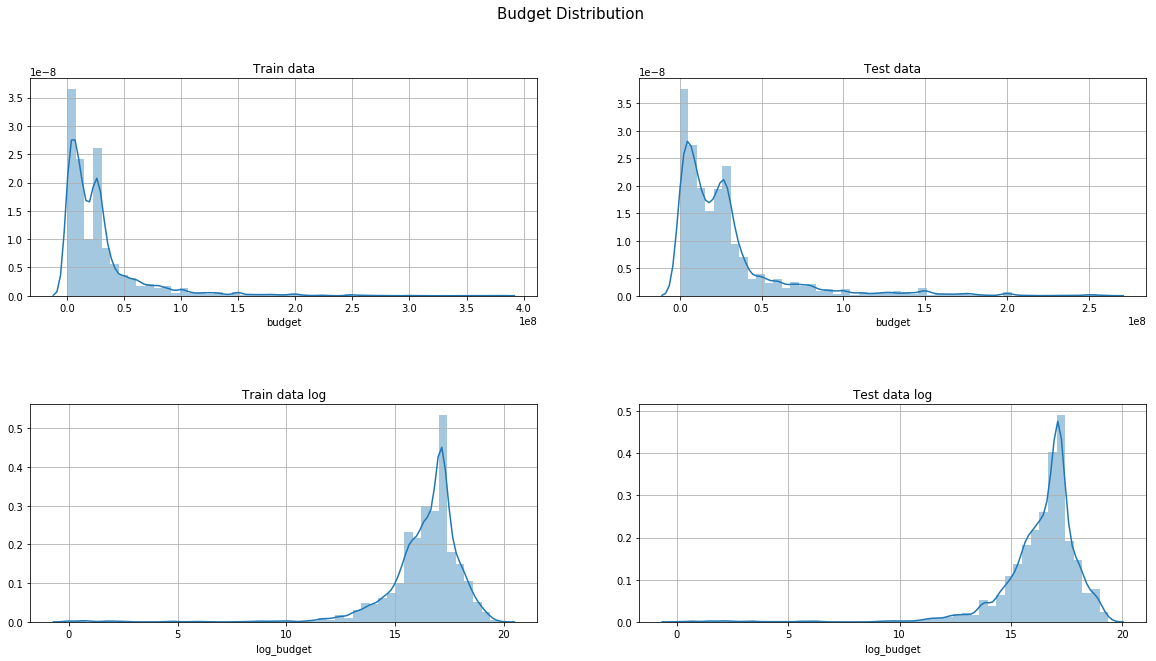

In [86]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(20,10))
fig.suptitle('Budget Distribution', fontsize=15)
fig.subplots_adjust(hspace=0.5)

ax[0,0].set_title("Train data")
plt1 = sns.distplot(data_train_cleaned['budget'], ax=ax[0,0])
plt1.grid()

ax[0,1].set_title("Test data")
plt2 = sns.distplot(data_test_cleaned['budget'], ax=ax[0,1])
plt2.grid()

ax[1,0].set_title("Train data log")
plt1 = sns.distplot(log_transform(data_train_cleaned, 'budget')['log_budget'], ax=ax[1,0])
plt1.grid()

ax[1,1].set_title("Test data log")
plt2 = sns.distplot(log_transform(data_test_cleaned, 'budget')['log_budget'], ax=ax[1,1])
plt2.grid()

In [87]:
# Calculate skweness
print("Skweness budget for train data: {}".format(stats.skew(data_train_cleaned['budget'])))
print("Skweness budget for test data: {}\n".format(stats.skew(data_test_cleaned['budget'])))

# Skeweness of log data
print("Skweness budget for log train data: {}".format(stats.skew(log_transform(data_train_cleaned, 'budget')['log_budget'])))
print("Skweness budget for log test data: {}".format(stats.skew(log_transform(data_test_cleaned, 'budget')['log_budget'])))


Skweness budget for train data: 3.2243749956517473
Skweness budget for test data: 2.826715697985534

Skweness budget for log train data: -3.836936348432292
Skweness budget for log test data: -3.5549880408732344


After applying logarithmic transform to `budget` we can see that it only skews the data to the left. However it does even the data a little bit.

In [88]:
data_train_cleaned = data_train_cleaned.drop(['budget'], axis=1)
data_test_cleaned = data_test_cleaned.drop(['budget'], axis=1)

**Popularity skewness**

As we can see below popularity data is very skewed. We'll need to apply logarithmic transformations.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


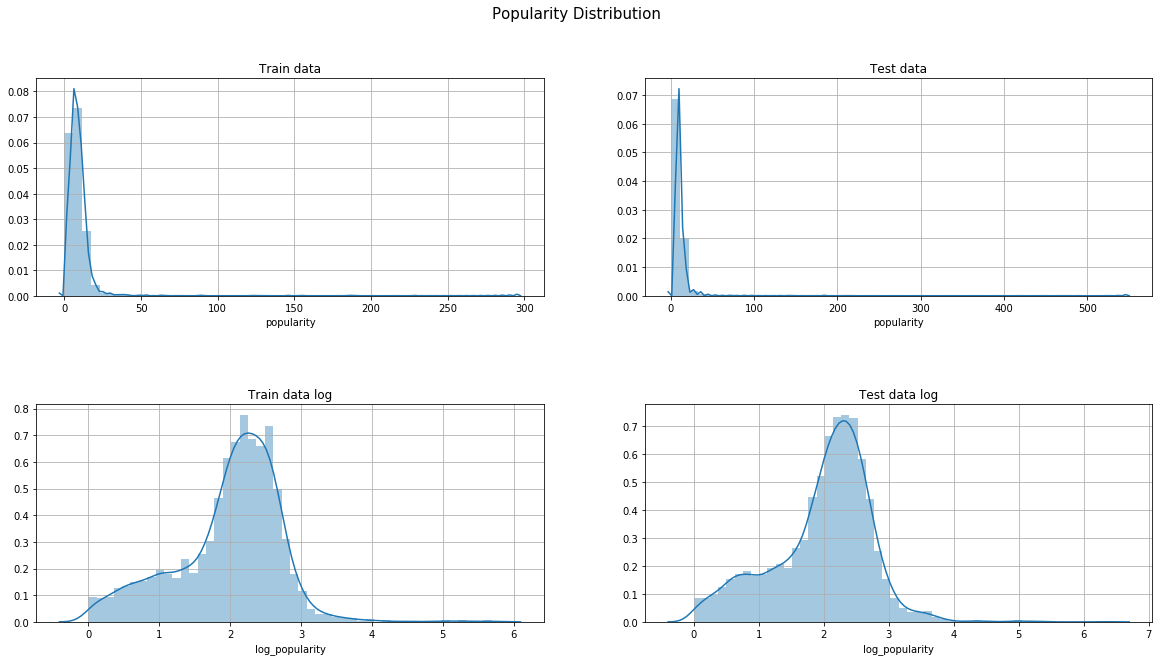

In [89]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(20,10))
fig.suptitle('Popularity Distribution', fontsize=15)
fig.subplots_adjust(hspace=0.5)


ax[0,0].set_title("Train data")
plt1 = sns.distplot(data_train_cleaned['popularity'], bins=50, ax=ax[0,0])
plt1.grid()

ax[0,1].set_title("Test data")
plt2 = sns.distplot(data_test_cleaned['popularity'],  bins=50, ax=ax[0,1])
plt2.grid()


ax[1,0].set_title("Train data log")
plt1 = sns.distplot(log_transform(data_train_cleaned, 'popularity')['log_popularity'], ax=ax[1,0])
plt1.grid()

ax[1,1].set_title("Test data log")
plt2 = sns.distplot(log_transform(data_test_cleaned, 'popularity')['log_popularity'], ax=ax[1,1])
plt2.grid()

In [90]:
print("Skweness popularity for train data: {}".format(stats.skew(data_train_cleaned['popularity'])))
print("Skweness popularity for test data: {}\n".format(stats.skew(data_test_cleaned['popularity'])))

print("Skweness popularity for log train data: {}".format(stats.skew(data_train_cleaned['log_popularity'])))
print("Skweness popularity for log test data: {}".format(stats.skew(data_test_cleaned['log_popularity'])))

Skweness popularity for train data: 14.370217030899378
Skweness popularity for test data: 23.674918491012885

Skweness popularity for log train data: -0.42365186230326146
Skweness popularity for log test data: -0.44705030422067615


Applying a logarithm transformation definitely reduces skeweness in popularity. We'll use the log values instead of the original data.

In [91]:
data_train_cleaned = data_train_cleaned.drop(['popularity'], axis=1)
data_test_cleaned = data_test_cleaned.drop(['popularity'], axis=1)

**Revenue Skewness**

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


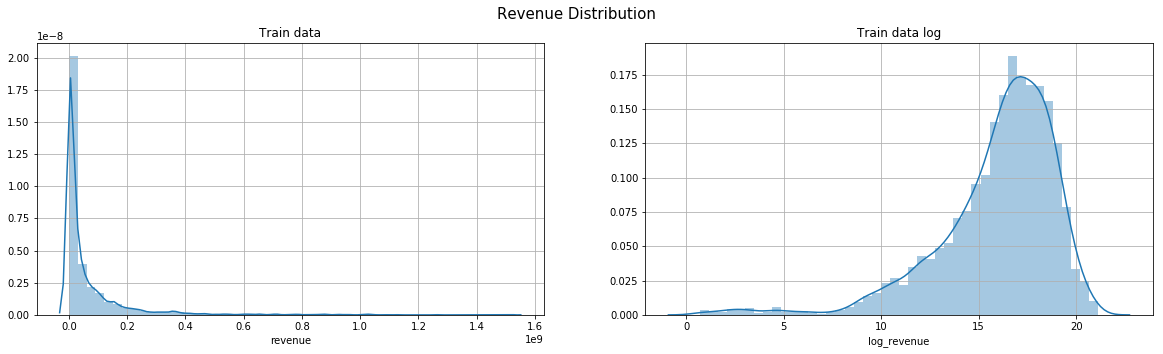

In [92]:
fig, ax = plt.subplots(ncols=2, figsize=(20,5))
fig.suptitle('Revenue Distribution', fontsize=15)
fig.subplots_adjust(hspace=0.5)


ax[0].set_title("Train data")
plt1 = sns.distplot(data_train_cleaned['revenue'], bins=50, ax=ax[0])
plt1.grid()

ax[1].set_title("Train data log")
plt1 = sns.distplot(log_transform(data_train_cleaned, 'revenue')['log_revenue'], ax=ax[1])
plt1.grid()


In [93]:
print("Skweness popularity for train data: {}".format(stats.skew(data_train_cleaned['revenue'])))
print("Skweness popularity for log train data: {}".format(stats.skew(data_train_cleaned['log_revenue'])))

Skweness popularity for train data: 4.540013843499753
Skweness popularity for log train data: -1.6497105398732625


It seems that the dependent variable (revenue) is skewed, thus we apply logarithmic transformation. However I need to remember to apply the inverse (exp) to the predicted values at the end.

In [94]:
# Drop the original values of revenue
data_train_cleaned = data_train_cleaned.drop(['revenue'], axis=1)

#### Impact of different words on revenue

**To-do**: Find out how to turn text data into some sort of score later on?

* Overview
* Tagline

Calculating Word Frequencies with TF-IDF vectorizer. This stands for *Term Frequency - Inverse document frequency* which are the scores resulting from applying it:
* Term Frequency: How often a word appears within a document
* Inverse Document Frequency: Downscales words that appear a lot accross documents.

[How to Prepare Text Data for Machine Learning with scikit-learn](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)

In [95]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LinearRegression
import eli5

vectorizer = TfidfVectorizer(
            sublinear_tf=True,
            analyzer='word',
            token_pattern=r'\w{1,}',
            ngram_range=(1, 2),
            min_df=5)

vectorizer = vectorizer.fit(data_train_cleaned['overview'].fillna(''))
overview_text = vectorizer.transform(data_train_cleaned['overview'].fillna(''))
linreg = LinearRegression()
linreg.fit(overview_text, data_train_cleaned['log_revenue'])
eli5.show_weights(linreg, vec=vectorizer, top=20, feature_filter=lambda x: x != '<BIAS>')

In [96]:
display(data_train_cleaned.head(n=2))

,id,belongs_to_collection,homepage,original_title,overview,poster_path,release_date,runtime,tagline,title,release_month,release_day,release_year,num_genres,all_genres,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,genre_War,genre_Documentary,genre_Western,genre_Foreign,genre_TV Movie,num_production_companies,all_production_companies,production_company_Warner_Bros.,production_company_Universal_Pictures,production_company_Paramount_Pictures,production_company_Twentieth_Century_Fox_Film_Corporation,production_company_Columbia_Pictures,production_company_Metro-Goldwyn-Mayer_(MGM),production_company_New_Line_Cinema,production_company_Touchstone_Pictures,production_company_Walt_Disney_Pictures,production_company_Columbia_Pictures_Corporation,production_company_TriStar_Pictures,production_company_Relativity_Media,production_company_Canal+,production_company_United_Artists,production_company_Miramax_Films,production_company_Village_Roadshow_Pictures,production_company_Regency_Enterprises,production_company_BBC_Films,production_company_Dune_Entertainment,production_company_Working_Title_Films,production_company_Fox_Searchlight_Pictures,production_company_StudioCanal,production_company_Lionsgate,production_company_DreamWorks_SKG,production_company_Fox_2000_Pictures,production_company_Summit_Entertainment,production_company_Hollywood_Pictures,production_company_Orion_Pictures,production_company_Amblin_Entertainment,production_company_Dimension_Films,num_spoken_languages,all_spoken_languages,language_English,language_Français,language_Español,language_Deutsch,language_Pусский,language_Italiano,language_日本語,language_普通话,language_हिन्दी,language_,language_Português,language_العربية,language_한국어/조선말,language_广州话 / 廣州話,language_தமிழ்,language_Polski,language_Magyar,language_Latin,language_svenska,language_ภาษาไทย,language_Český,language_עִבְרִית,language_ελληνικά,language_Türkçe,language_Dansk,original_language_en,original_language_fr,original_language_ru,original_language_es,original_language_hi,original_language_ja,original_language_it,original_language_ko,original_language_cn,original_language_zh,original_language_de,original_language_ta,original_language_sv,original_language_nl,original_language_pt,original_language_fa,original_language_da,original_language_ro,original_language_tr,original_language_hu,original_language_te,original_language_fi,original_language_no,original_language_pl,original_language_ml,original_language_sr,original_language_cs,original_language_mr,original_language_el,original_language_ur,original_language_he,original_language_ar,original_language_nb,original_language_vi,original_language_bn,original_language_id,num_keywords,all_keywords,keyword_woman director,keyword_independent film,keyword_duringcreditsstinger,keyword_murder,keyword_based on novel,keyword_violence,keyword_sport,keyword_biography,keyword_aftercreditsstinger,keyword_dystopia,keyword_revenge,keyword_friendship,keyword_sex,keyword_suspense,keyword_sequel,keyword_love,keyword_police,keyword_teenager,keyword_nudity,keyword_female nudity,keyword_drug,keyword_prison,keyword_musical,keyword_high school,keyword_los angeles,keyword_new york,keyword_family,keyword_father son relationship,keyword_kidnapping,keyword_investigation,status_released,num_production_countries,all_production_countries,production_country_United_States_of_America,production_country_United_Kingdom,production_country_France,production_country_Germany,production_country_Canada,production_country_India,production_country_Italy,production_country_Japan,production_country_Australia,production_country_Russia,production_country_Spain,production_country_China,production_country_Hong_Kong,production_country_Ireland,production_country_Belgium,production_country_South_Korea,production_country_Mexico,production_country_Sweden,production_co

### Remove unwanted features

Finally we remove some of the features that we won't need anymore (at least for now). I will call them Final, however I still might need to apply some scaling if we I am goingn to use something like a Neural Network.

In [97]:
features_to_drop = ['original_title', 'overview', 'release_date', 'tagline', 'title',
                   'all_genres', 'all_production_companies', 'all_spoken_languages',
                   'all_keywords', 'all_production_countries', 'all_cast', 'all_cast',
                   'all_crew', 'all_characters']

def drop_features(df, features_list):
    df = df.drop(features_list, axis=1)
    
    return df

In [98]:
data_train_cleaned = drop_features(data_train_cleaned, features_to_drop)
data_test_cleaned = drop_features(data_test_cleaned, features_to_drop)

display(data_train_cleaned.head())
display(data_test_cleaned.head())

,id,belongs_to_collection,homepage,poster_path,runtime,release_month,release_day,release_year,num_genres,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,genre_War,genre_Documentary,genre_Western,genre_Foreign,genre_TV Movie,num_production_companies,production_company_Warner_Bros.,production_company_Universal_Pictures,production_company_Paramount_Pictures,production_company_Twentieth_Century_Fox_Film_Corporation,production_company_Columbia_Pictures,production_company_Metro-Goldwyn-Mayer_(MGM),production_company_New_Line_Cinema,production_company_Touchstone_Pictures,production_company_Walt_Disney_Pictures,production_company_Columbia_Pictures_Corporation,production_company_TriStar_Pictures,production_company_Relativity_Media,production_company_Canal+,production_company_United_Artists,production_company_Miramax_Films,production_company_Village_Roadshow_Pictures,production_company_Regency_Enterprises,production_company_BBC_Films,production_company_Dune_Entertainment,production_company_Working_Title_Films,production_company_Fox_Searchlight_Pictures,production_company_StudioCanal,production_company_Lionsgate,production_company_DreamWorks_SKG,production_company_Fox_2000_Pictures,production_company_Summit_Entertainment,production_company_Hollywood_Pictures,production_company_Orion_Pictures,production_company_Amblin_Entertainment,production_company_Dimension_Films,num_spoken_languages,language_English,language_Français,language_Español,language_Deutsch,language_Pусский,language_Italiano,language_日本語,language_普通话,language_हिन्दी,language_,language_Português,language_العربية,language_한국어/조선말,language_广州话 / 廣州話,language_தமிழ்,language_Polski,language_Magyar,language_Latin,language_svenska,language_ภาษาไทย,language_Český,language_עִבְרִית,language_ελληνικά,language_Türkçe,language_Dansk,original_language_en,original_language_fr,original_language_ru,original_language_es,original_language_hi,original_language_ja,original_language_it,original_language_ko,original_language_cn,original_language_zh,original_language_de,original_language_ta,original_language_sv,original_language_nl,original_language_pt,original_language_fa,original_language_da,original_language_ro,original_language_tr,original_language_hu,original_language_te,original_language_fi,original_language_no,original_language_pl,original_language_ml,original_language_sr,original_language_cs,original_language_mr,original_language_el,original_language_ur,original_language_he,original_language_ar,original_language_nb,original_language_vi,original_language_bn,original_language_id,num_keywords,keyword_woman director,keyword_independent film,keyword_duringcreditsstinger,keyword_murder,keyword_based on novel,keyword_violence,keyword_sport,keyword_biography,keyword_aftercreditsstinger,keyword_dystopia,keyword_revenge,keyword_friendship,keyword_sex,keyword_suspense,keyword_sequel,keyword_love,keyword_police,keyword_teenager,keyword_nudity,keyword_female nudity,keyword_drug,keyword_prison,keyword_musical,keyword_high school,keyword_los angeles,keyword_new york,keyword_family,keyword_father son relationship,keyword_kidnapping,keyword_investigation,status_released,num_production_countries,production_country_United_States_of_America,production_country_United_Kingdom,production_country_France,production_country_Germany,production_country_Canada,production_country_India,production_country_Italy,production_country_Japan,production_country_Australia,production_country_Russia,production_country_Spain,production_country_China,production_country_Hong_Kong,production_country_Ireland,production_country_Belgium,production_country_South_Korea,production_country_Mexico,production_country_Sweden,production_country_New_Zealand,production_country_Netherlands,production_country_Czech_Republic,production_country_Denmark,production_country_Brazil,production

,id,belongs_to_collection,homepage,poster_path,runtime,release_month,release_day,release_year,num_genres,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,genre_War,genre_Documentary,genre_Western,genre_Foreign,genre_TV Movie,num_production_companies,production_company_Warner_Bros.,production_company_Universal_Pictures,production_company_Paramount_Pictures,production_company_Twentieth_Century_Fox_Film_Corporation,production_company_Columbia_Pictures,production_company_Metro-Goldwyn-Mayer_(MGM),production_company_New_Line_Cinema,production_company_Touchstone_Pictures,production_company_Walt_Disney_Pictures,production_company_Canal+,production_company_Columbia_Pictures_Corporation,production_company_TriStar_Pictures,production_company_Relativity_Media,production_company_Miramax_Films,production_company_United_Artists,production_company_Village_Roadshow_Pictures,production_company_DreamWorks_SKG,production_company_Regency_Enterprises,production_company_Amblin_Entertainment,production_company_Lionsgate,production_company_Fox_Searchlight_Pictures,production_company_Summit_Entertainment,production_company_StudioCanal,production_company_Dimension_Films,production_company_Working_Title_Films,production_company_Orion_Pictures,production_company_Imagine_Entertainment,production_company_Dune_Entertainment,production_company_Film4,production_company_Hollywood_Pictures,num_spoken_languages,language_English,language_Français,language_Español,language_Deutsch,language_Pусский,language_Italiano,language_日本語,language_हिन्दी,language_普通话,language_,language_العربية,language_Português,language_广州话 / 廣州話,language_Polski,language_Latin,language_한국어/조선말,language_Magyar,language_Český,language_ภาษาไทย,language_svenska,language_עִבְרִית,language_தமிழ்,language_Türkçe,language_ελληνικά,language_Română,original_language_en,original_language_fr,original_language_hi,original_language_ru,original_language_ja,original_language_es,original_language_it,original_language_de,original_language_ko,original_language_zh,original_language_cn,original_language_ta,original_language_sv,original_language_da,original_language_ml,original_language_te,original_language_pt,original_language_tr,original_language_he,original_language_th,original_language_ro,original_language_nl,original_language_no,original_language_pl,original_language_bn,original_language_sr,original_language_cs,original_language_bm,original_language_fi,original_language_el,original_language_id,original_language_xx,original_language_ka,original_language_ca,original_language_af,original_language_ur,original_language_kn,original_language_is,original_language_hu,num_keywords,keyword_woman director,keyword_independent film,keyword_duringcreditsstinger,keyword_based on novel,keyword_murder,keyword_violence,keyword_love,keyword_revenge,keyword_sex,keyword_aftercreditsstinger,keyword_biography,keyword_musical,keyword_friendship,keyword_nudity,keyword_police,keyword_sport,keyword_dystopia,keyword_suspense,keyword_sequel,keyword_teenager,keyword_los angeles,keyword_drug,keyword_female nudity,keyword_new york,keyword_3d,keyword_world war ii,keyword_alien,keyword_family,keyword_prison,keyword_high school,status_released,num_production_countries,production_country_United_States_of_America,production_country_United_Kingdom,production_country_France,production_country_Germany,production_country_Canada,production_country_India,production_country_Japan,production_country_Italy,production_country_Australia,production_country_Spain,production_country_Russia,production_country_China,production_country_Hong_Kong,production_country_Belgium,production_country_Ireland,production_country_South_Korea,production_country_Sweden,production_country_Netherlands,production_country_Denmark,production_country_Mexico,production_country_New_Zealand,production_country_Switzerland,pr

### Scaling the data

Apply Standard Scaler ?

### Adding up all the Data Pre-Processing and Feature Engineering

I'll create a function to add up all the data pre-processing and Feauture Engineering into a single function that we can apply individually to each model when performing Cross Validation. This will help avoid Overfitting.

In [99]:
def feature_engineering (df):
    """
    Data Pre-Processing
    """
    df = runtime_pre_process(df)
    
    df = release_year_pre_process(df)
    
    df = homepage_pre_process(df)
    
    df = poster_pre_process(df)
    
    df = imputing_budget(df)
    
    df = collection_pre_process(df)
    
    df = genres_pre_processing(df)
    
    df = imput_title(df)
    
    df = prod_comp_pre_processing(df)
    
    df = spoken_lang_pre_processing(df)
    
    df = keywords_pre_processing(df)
    
    df = cast_pre_processing(df)
    
    df = crew_pre_processing(df)
    
    df = overview_pre_process(df)
    
    df = tagline_pre_process(df)
    
    df = prod_countries_pre_process(df)
    
    df = status_pre_process(df)
    
    """
    Feature Engineering
    """
    # Convert panda string to list
    df = string2_list(df)
    
    # Genres
    genres_list = flatten_data_column(df['genres'])
    genres_list_counter = create_counter(genres_list)
    df = genres_FE(df, genres_list_counter)
    
    # Production Companies
    prod_companies_list = flatten_data_column(df['production_companies'])
    prod_companies_list_counter = create_counter(prod_companies_list)
    df = prod_companies_FE(df, prod_companies_list_counter, 30)
    
    # Spoken Languages
    spoken_languages_list = flatten_data_column(df['spoken_languages'])
    spoken_languages_list_counter = create_counter(spoken_languages_list)
    df = spoken_languages_FE(df, spoken_languages_list_counter, 25)
    
    # Original Language
    original_language_list = list_original_languages(df['original_language'])
    original_language_list_counter = Counter(original_language_list).most_common()
    df = original_language_FE(df, original_language_list_counter)
    
    # Keywords
    keywords_list = flatten_data_column(df['Keywords'])
    keywords_list_counter = create_counter(keywords_list)
    df = keywords_FE(df, keywords_list_counter, 30)
    
    # Status
    status_list = list_original_languages(df['status'])
    status_list_counter = Counter(status_list).most_common()
    df = status_FE(df)
    
    # Production Countries
    prod_countries_list = flatten_data_column(df['production_countries'])
    prod_countries_list_counter = create_counter(prod_countries_list)
    df = prod_countries_FE(df, prod_countries_list_counter, 30)
    
    # Cast
    cast_list = flatten_data_column(df['cast'])
    cast_name_list_counter = create_counter(cast_list, 'name')
    cast_character_list_counter = create_counter(cast_list, 'character')
    df = cast_FE(df, cast_name_list_counter, cast_character_list_counter, 30)
    
    # Crew
    crew_list = flatten_data_column(df['crew'])
    crew_name_list_counter = create_counter(crew_list, 'name')
    crew_job_list_counter = create_counter(crew_list, 'job')
    crew_dep_list_counter = create_counter(crew_list, 'department')
    df = crew_FE(df, crew_name_list_counter, crew_job_list_counter, crew_dep_list_counter, 30)
    
    # Budget
    df = log_transform(df, 'budget')
    df = df.drop(['budget'], axis=1)
    
    # Popularity
    df = log_transform(df, 'popularity')
    df = df.drop(['popularity'], axis=1)
    
    # Revenue
    #df = log_transform(df, 'revenue')
    #df = df.drop(['revenue'], axis=1)
    
    # Drop unwanted Features
    features_to_drop = ['original_title', 'overview', 'release_date', 'tagline', 'title',
                   'all_genres', 'all_production_companies', 'all_spoken_languages',
                   'all_keywords', 'all_production_countries', 'all_cast', 'all_cast',
                   'all_crew', 'all_characters', 'imdb_id']
    
    df = drop_features(df, features_to_drop)
    
    return df

## 3 Further data exploration

Now that the data looks nice and clean I can do more data exploration:
* `Revenue` vs `Popularity`
* `Number of films` released vs `release_year`
* `Average Revenue` vs `year`
* `Number of films` released vs `month`
* `Number of films` vs day of the `month`
* `Belongs to collection` vs `not belongs to collection`
* `Revenue` vs `genre`
* `Revenue` vs `num_genres`
* `Revenue` vs `production_company`
* `Revenue` vs `num production_company`
* `Revenue` vs `production_country`
* `Revenue` vs `num_production_countries`
* `Revenue` vs `cast_member`
* `Revenue` vs `num_cast_member`
* `Revenue` vs `crew_member`
* `Revenue` vs `num_crew_member`

## 4. Choose evaluation metrics

The evaulation metric used by the competition is the [Root-mean-square deviation](https://en.wikipedia.org/wiki/Root-mean-square_deviation), [Khan-academy video](https://www.youtube.com/watch?v=zMFdb__sUpw)

The root-mean-square deviation is (as the name says) the square root of the standard deviation of the squared residuals (distance from the point to the line on the y axis)

## 5. Create a benchmark an improve from it

Lets create a simple model with no optimization see how well it does. Lets try to improve from there.

In [100]:
from sklearn.model_selection import train_test_split

seed = np.random.seed(34)

# Train data
data_train_bench = data_train_raw.copy().drop(['id', 'revenue'], axis=1)
data_train_bench = feature_engineering(data_train_bench)
# Test data
data_test_bench = data_test_raw.copy().drop(['id'], axis=1)
data_test_bench = feature_engineering(data_test_bench)

# Target data
target_train_bench = data_train_cleaned['log_revenue']

train_X_bench,test_X_bench, train_y_bench, test_y_bench = train_test_split(data_train_bench,
                                                                           target_train_bench,
                                                                           test_size=0.25,
                                                                           random_state=seed)

In [101]:
train_data_bench = lgb.Dataset(train_X_bench, label=train_y_bench)
val_data_bench = lgb.Dataset(test_X_bench, label=test_y_bench)

num_round = 1000

param = {'num_leaves':31,
         'metric': 'rmse',
         'objective':'regression'}

# Train the model
clf = lgb.train(param,
                train_data_bench,
                num_round,
                valid_sets=[train_data_bench, val_data_bench],
                verbose_eval=5000,
                early_stopping_rounds=100)

ypred = clf.predict(test_X_bench, num_iteration=clf.best_iteration)

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[92]	training's rmse: 1.00089	valid_1's rmse: 2.07914


In [102]:
# Calculate the rms of the model.
rms_benchmark = sqrt(mean_squared_error(test_y_bench, ypred))
print("The rms score is: {}".format(rms_benchmark))

The rms score is: 2.079141450867614


The score to beat is **2.079** in the valid dataset.

## 6. Split the data into k-folds

In [103]:
# Separate the target variable 
target = data_train_cleaned['log_revenue']
# Drop target data from train
data_train = data_train_raw.copy().drop(['id', 'revenue'], axis=1)

# Test data
data_test = data_test_raw.copy()
data_test = feature_engineering(data_test)

In [104]:
from sklearn.model_selection import KFold

# Split k-fold validation
n_splits = 15
random_state = np.random.seed(654658)

kf = KFold(n_splits=n_splits, random_state=random_state, shuffle=False)

## 7. Choose Models and implement them

Problably LightGBM + Feed Forward Network and maybe something else.

**LightGBM**

In [105]:
params = {'num_leaves': 30,
         'min_data_in_leaf': 20,
         'objective': 'regression',
         'max_depth': 3,
         'learning_rate': 0.01,
         "boosting": "gbdt",
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.2,
         "verbosity": -1}

**FIX**: When applying FE to X_train and X_val separately I get a different amount of columns (features). This can be because the valid fold, being smaller, generates less features when one hot encoding some of them, such as language, country etc.

Possible fixes:
* Apply a minimum of features that need to be present. If the features available is smaller than the minimum, fill with 0s??
* Only use the top 5-10 of every feature rather than top 30

For now I will apply FE to all the data and then split it, just to check if the model works.

In [106]:
# oof -> Out of fold. One single vector with all the validation predictions to
# then calculate the error upon this predictions.
oof = np.zeros(len(data_train))
predictions_test = np.zeros(len(data_test_cleaned))

# K-fold CV
for epoch, (train_index, val_index) in enumerate(kf.split(data_train.values)):
    # Only temporary
    training_data = data_train.copy()
    training_data = feature_engineering(training_data)
    
    X_train, X_val = training_data.loc[train_index], training_data.loc[val_index]
    y_train, y_val = target.loc[train_index], target.loc[val_index]
    
    # Need to fix this
    #X_train = feature_engineering(X_train)
    #X_val = feature_engineering(X_val)
    
    print("Fold index: {}".format(epoch + 1))
    
    train_data = lgb.Dataset(X_train, label=y_train)
    val_data = lgb.Dataset(X_val, label=y_val)
    
    num_round = 1000000
    
    # Train the model
    clf = lgb.train(params,
                    train_data,
                    num_round,
                    valid_sets=[train_data, val_data],
                    verbose_eval=5000,
                    early_stopping_rounds=1000) 
    
    # Out of fold vector
    oof[val_index] = clf.predict(X_val.astype('float32'), num_iteration=clf.best_iteration)
    
    # Calculate the average predictions for all folds for the test submsission data
    predictions_test += (clf.predict(data_test, num_iteration=clf.best_iteration) / kf.n_splits)

Fold index: 1
Training until validation scores don't improve for 1000 rounds.
[5000]	training's rmse: 1.49102	valid_1's rmse: 2.14367
Early stopping, best iteration is:
[6004]	training's rmse: 1.42808	valid_1's rmse: 2.13029
Fold index: 2
Training until validation scores don't improve for 1000 rounds.
[5000]	training's rmse: 1.49074	valid_1's rmse: 2.28044
Early stopping, best iteration is:
[5246]	training's rmse: 1.47274	valid_1's rmse: 2.27879
Fold index: 3
Training until validation scores don't improve for 1000 rounds.
[5000]	training's rmse: 1.48981	valid_1's rmse: 2.22656
Early stopping, best iteration is:
[4025]	training's rmse: 1.56715	valid_1's rmse: 2.21935
Fold index: 4
Training until validation scores don't improve for 1000 rounds.
[5000]	training's rmse: 1.48251	valid_1's rmse: 2.14387
Early stopping, best iteration is:
[6416]	training's rmse: 1.39082	valid_1's rmse: 2.13822
Fold index: 5
Training until validation scores don't improve for 1000 rounds.
[5000]	training's rmse

In [107]:
# Calculate the rms of the model.
rms = sqrt(mean_squared_error(target, oof))
print("The rms score is: {}".format(rms))

The rms score is: 2.089384446099025


## 8. Create an ensemble model

In this section I'll create an ensemble model. Then I'll submit the ensemble that has the best accuracy in the oof.

**Note**: I don't need to reverse the logarithms of revenue for the train predictions (oof) because this data is not going to use to make the submission.

In [108]:
ensemble_oof = 1*oof # + 0 * oof_ann

In [109]:
# Calculate the rms of the model.
rms = sqrt(mean_squared_error(target, ensemble_oof))
print("The rms score is: {}".format(rms))

The rms score is: 2.089384446099025


#### FINAL PREDICTIONS FOR SUMBISSION

I applied the logarithm for the target `revenue` before to deal with skewness. Now I have to undo this before I make the final submission.

**Predictions for the test data with LGBM**

In [110]:
# Log PREDICTION results from the lgbm
log_predictions_lgbm = pd.DataFrame(data=predictions_test, columns=['revenue'])
# Undo logs for the final submission
predictions_lgbm = log_predictions_lgbm['revenue'].apply(lambda x: np.exp(x) - 1)

**Predictions for the test data with Neural Network**

**Ensemble of Test Data**

In [111]:
ensemble_submission = 1*predictions_lgbm # + 0 * predictions_ann

## 9. Create submission

In [112]:
display(ensemble_submission.head())

0    1235.944215
1     475.615365
2     109.101549
3     196.709047
4      64.430820
Name: revenue, dtype: float64

In [113]:
submission_ensemble = pd.DataFrame({"id": data_test_raw["id"].values})
submission_ensemble["revenue"] = predictions_lgbm
submission_ensemble.to_csv("submission.csv", index=False)

In [114]:
display(len(submission_ensemble))

4398